<a href="https://colab.research.google.com/github/santhiravuri/generative-ai-internship/blob/main/day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

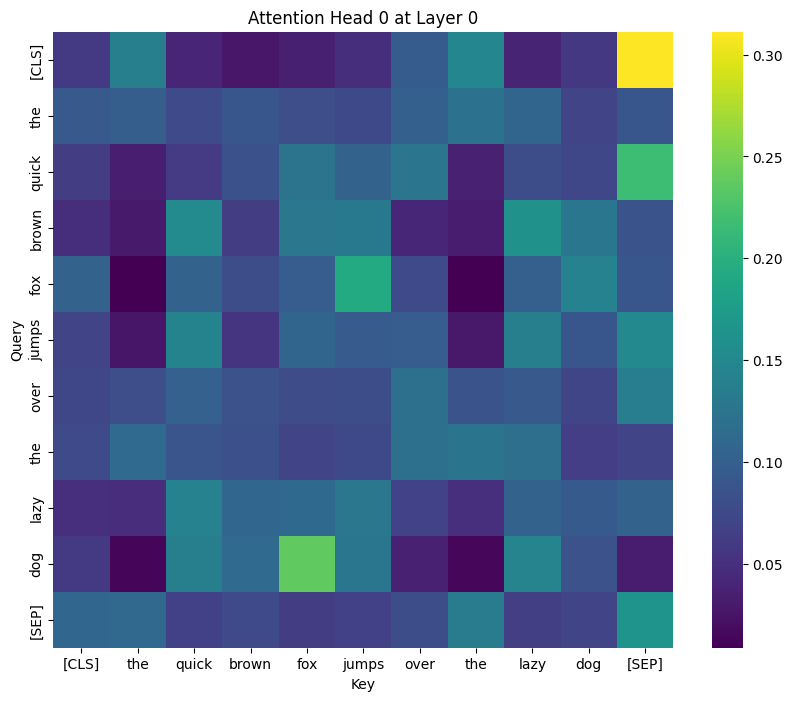

In [1]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load BERT with attention output
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True, attn_implementation="eager")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

attentions = outputs.attentions  # List of 12 layers, each with (1, 12, seq_len, seq_len)

# Visualize attention from 1 layer & head
layer = 0
head = 0
attention = attentions[layer][0, head].detach().numpy()
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

plt.figure(figsize=(10, 8))
sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title(f"Attention Head {head} at Layer {layer}")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


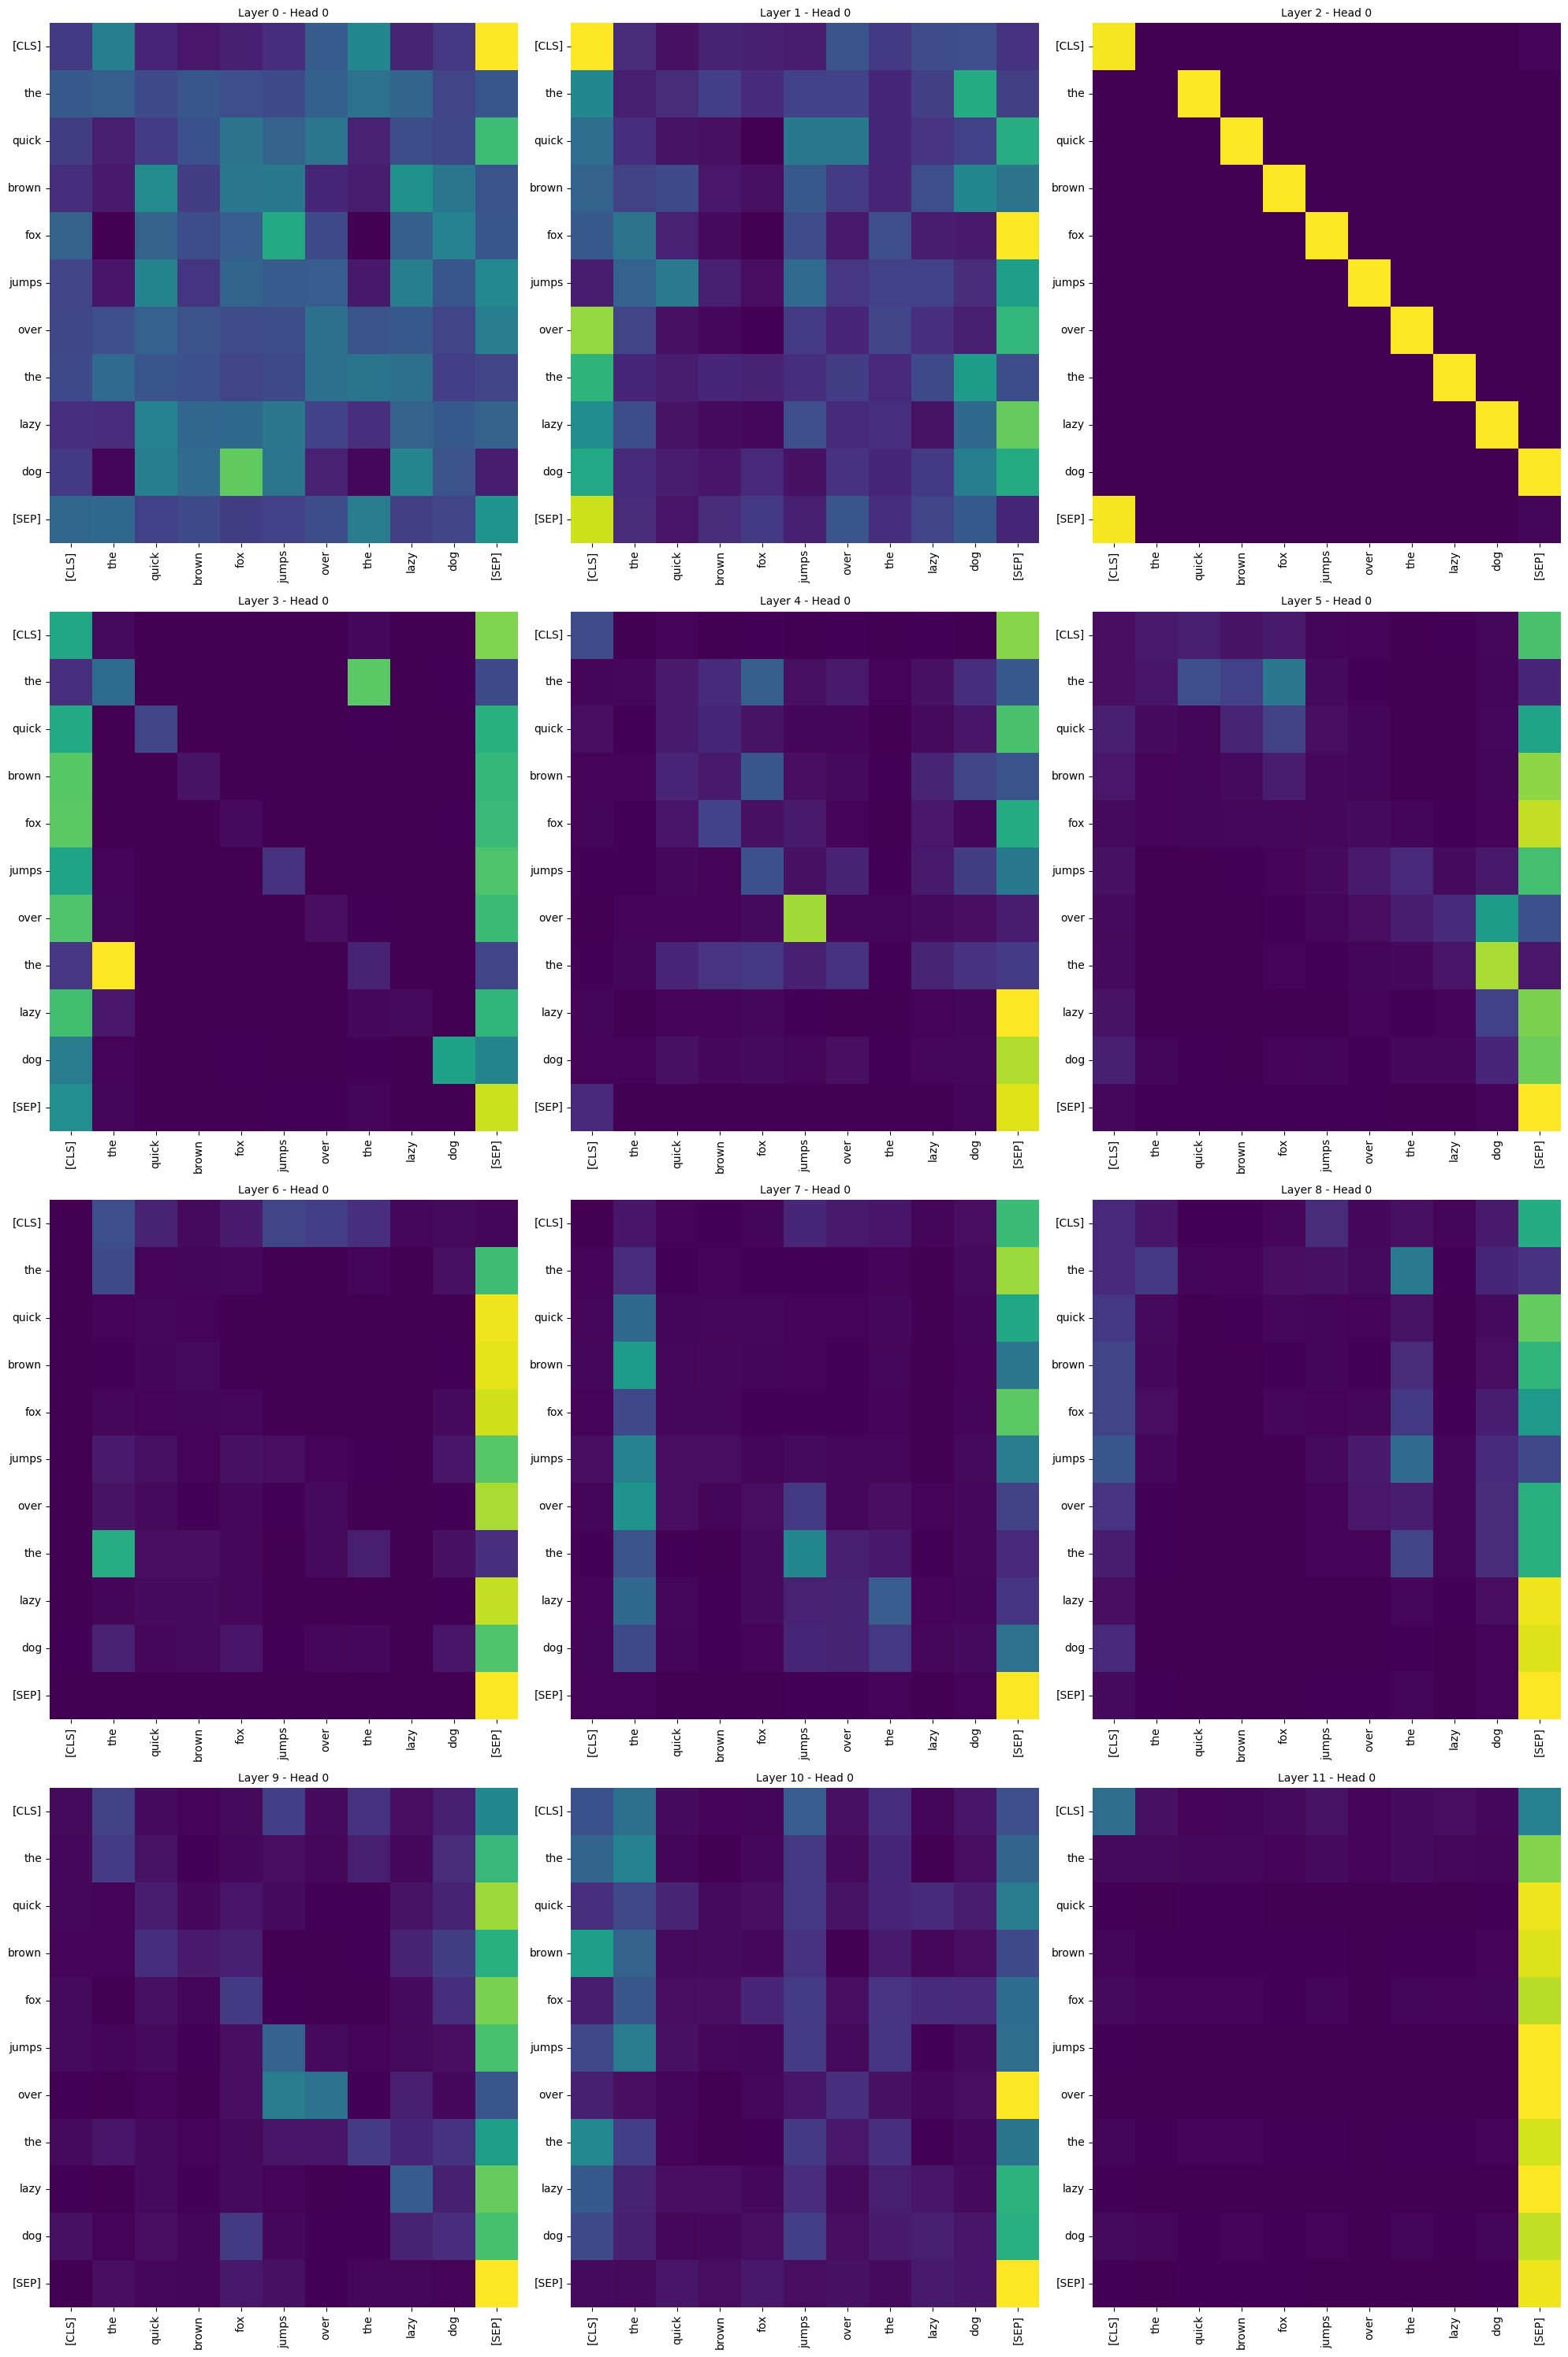

In [2]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load model with attention output (manual implementation)
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True,
    attn_implementation="eager"
)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Input sentence
text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

attentions = outputs.attentions  # List of 12 attention maps (1 per layer)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Visualize head 0 across all 12 layers
num_layers = len(attentions)
plt.figure(figsize=(20, 30))  # Wider figure for readability

for layer in range(num_layers):
    plt.subplot(4, 3, layer + 1)
    attention = attentions[layer][0, 0].detach().numpy()  # Head 0 of this layer
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis", cbar=False)
    plt.title(f"Layer {layer} - Head 0", fontsize=10)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


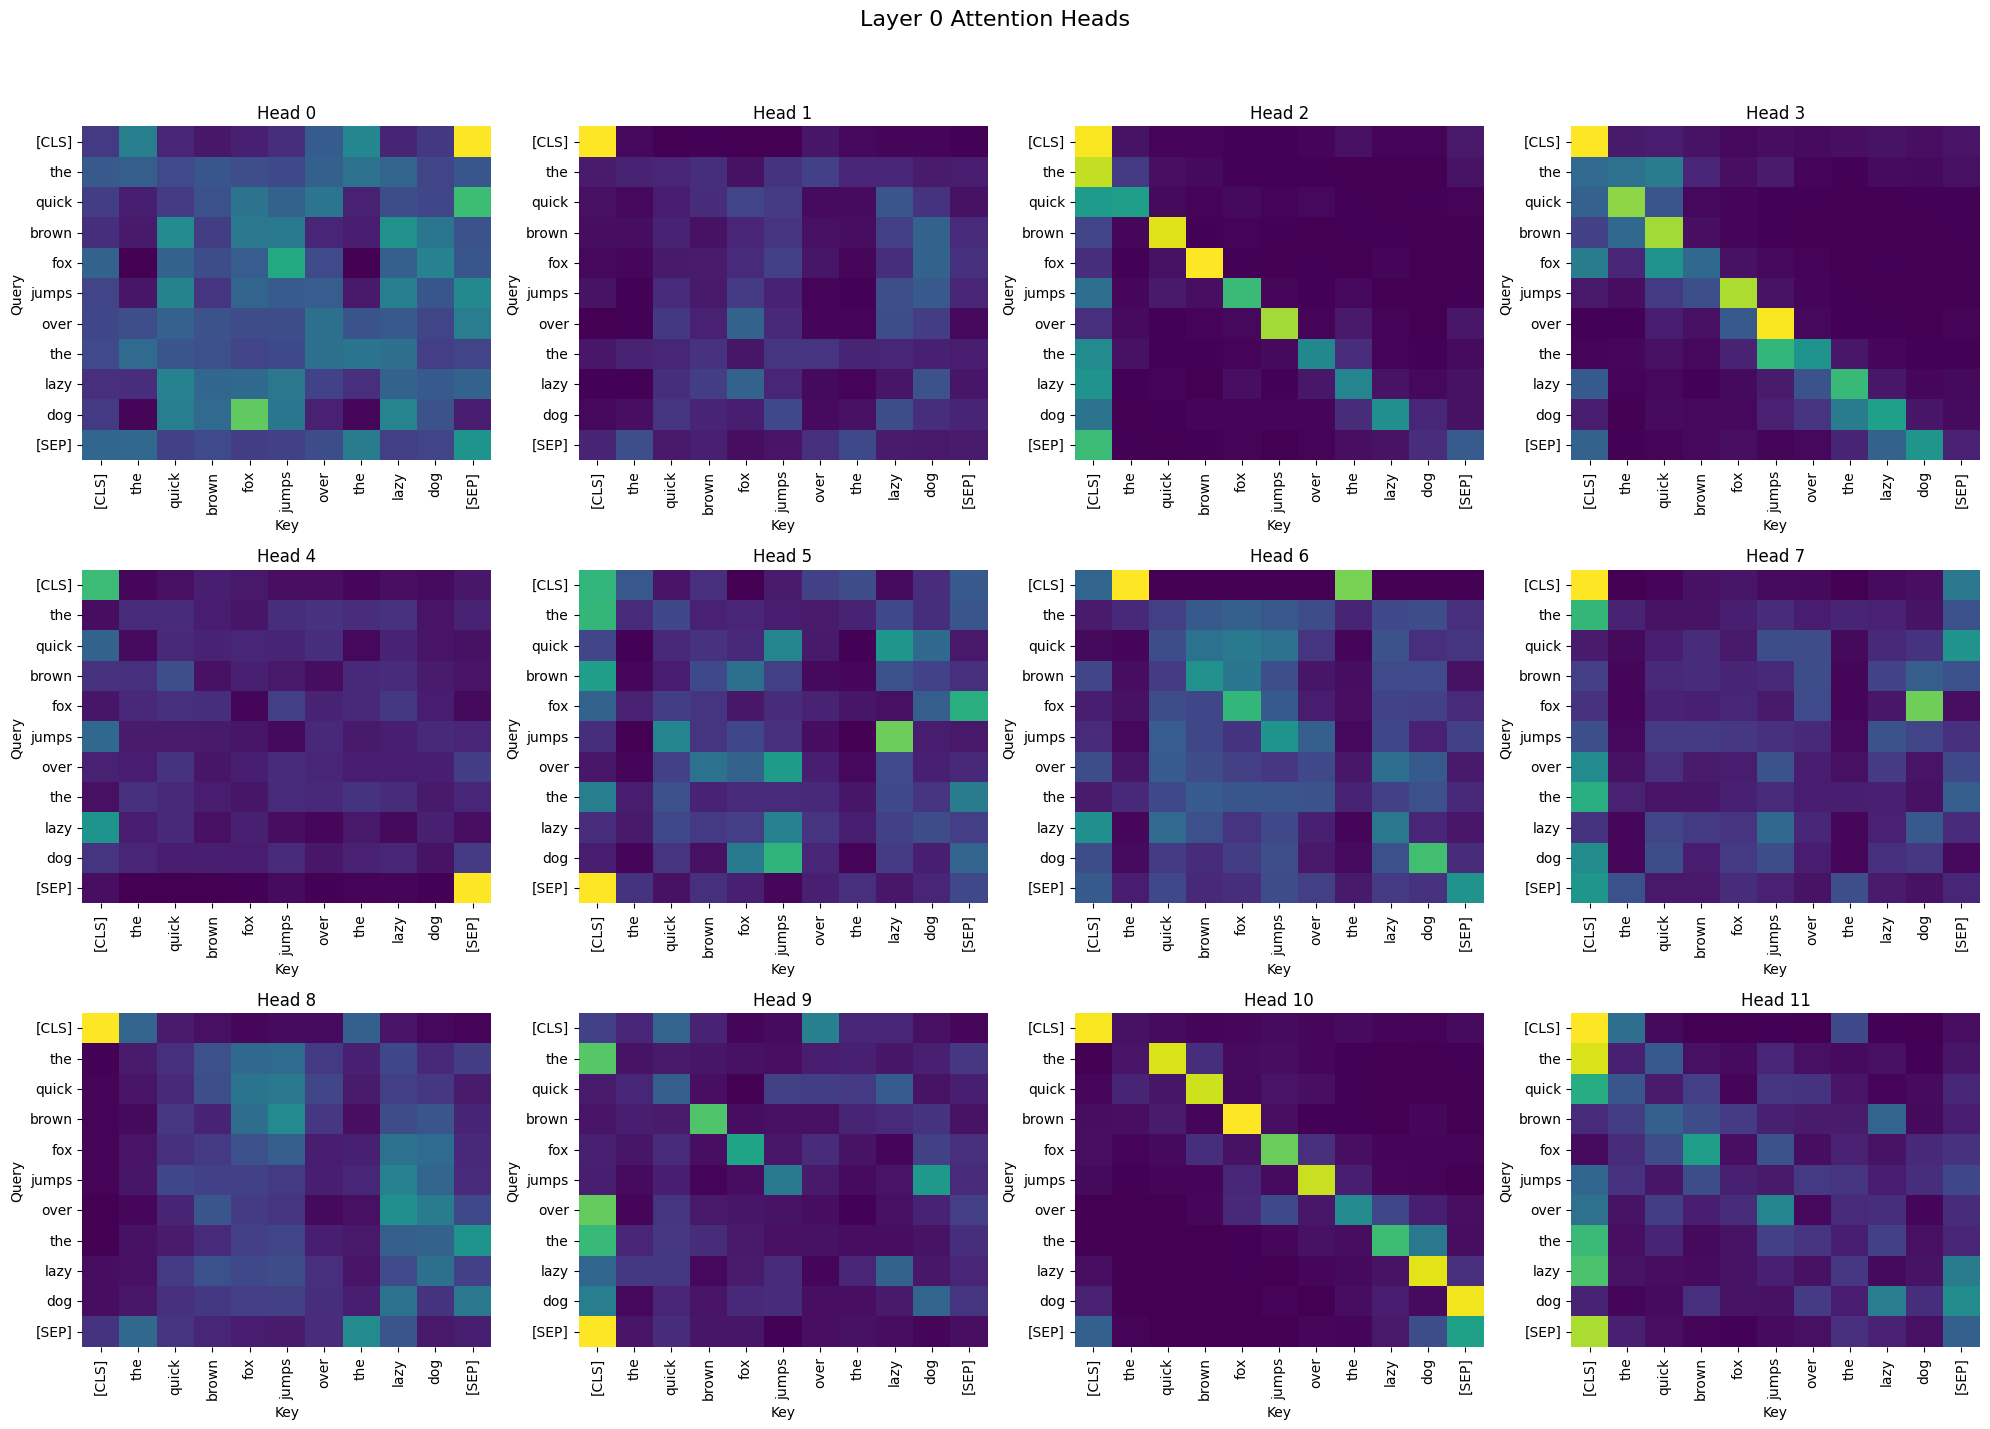

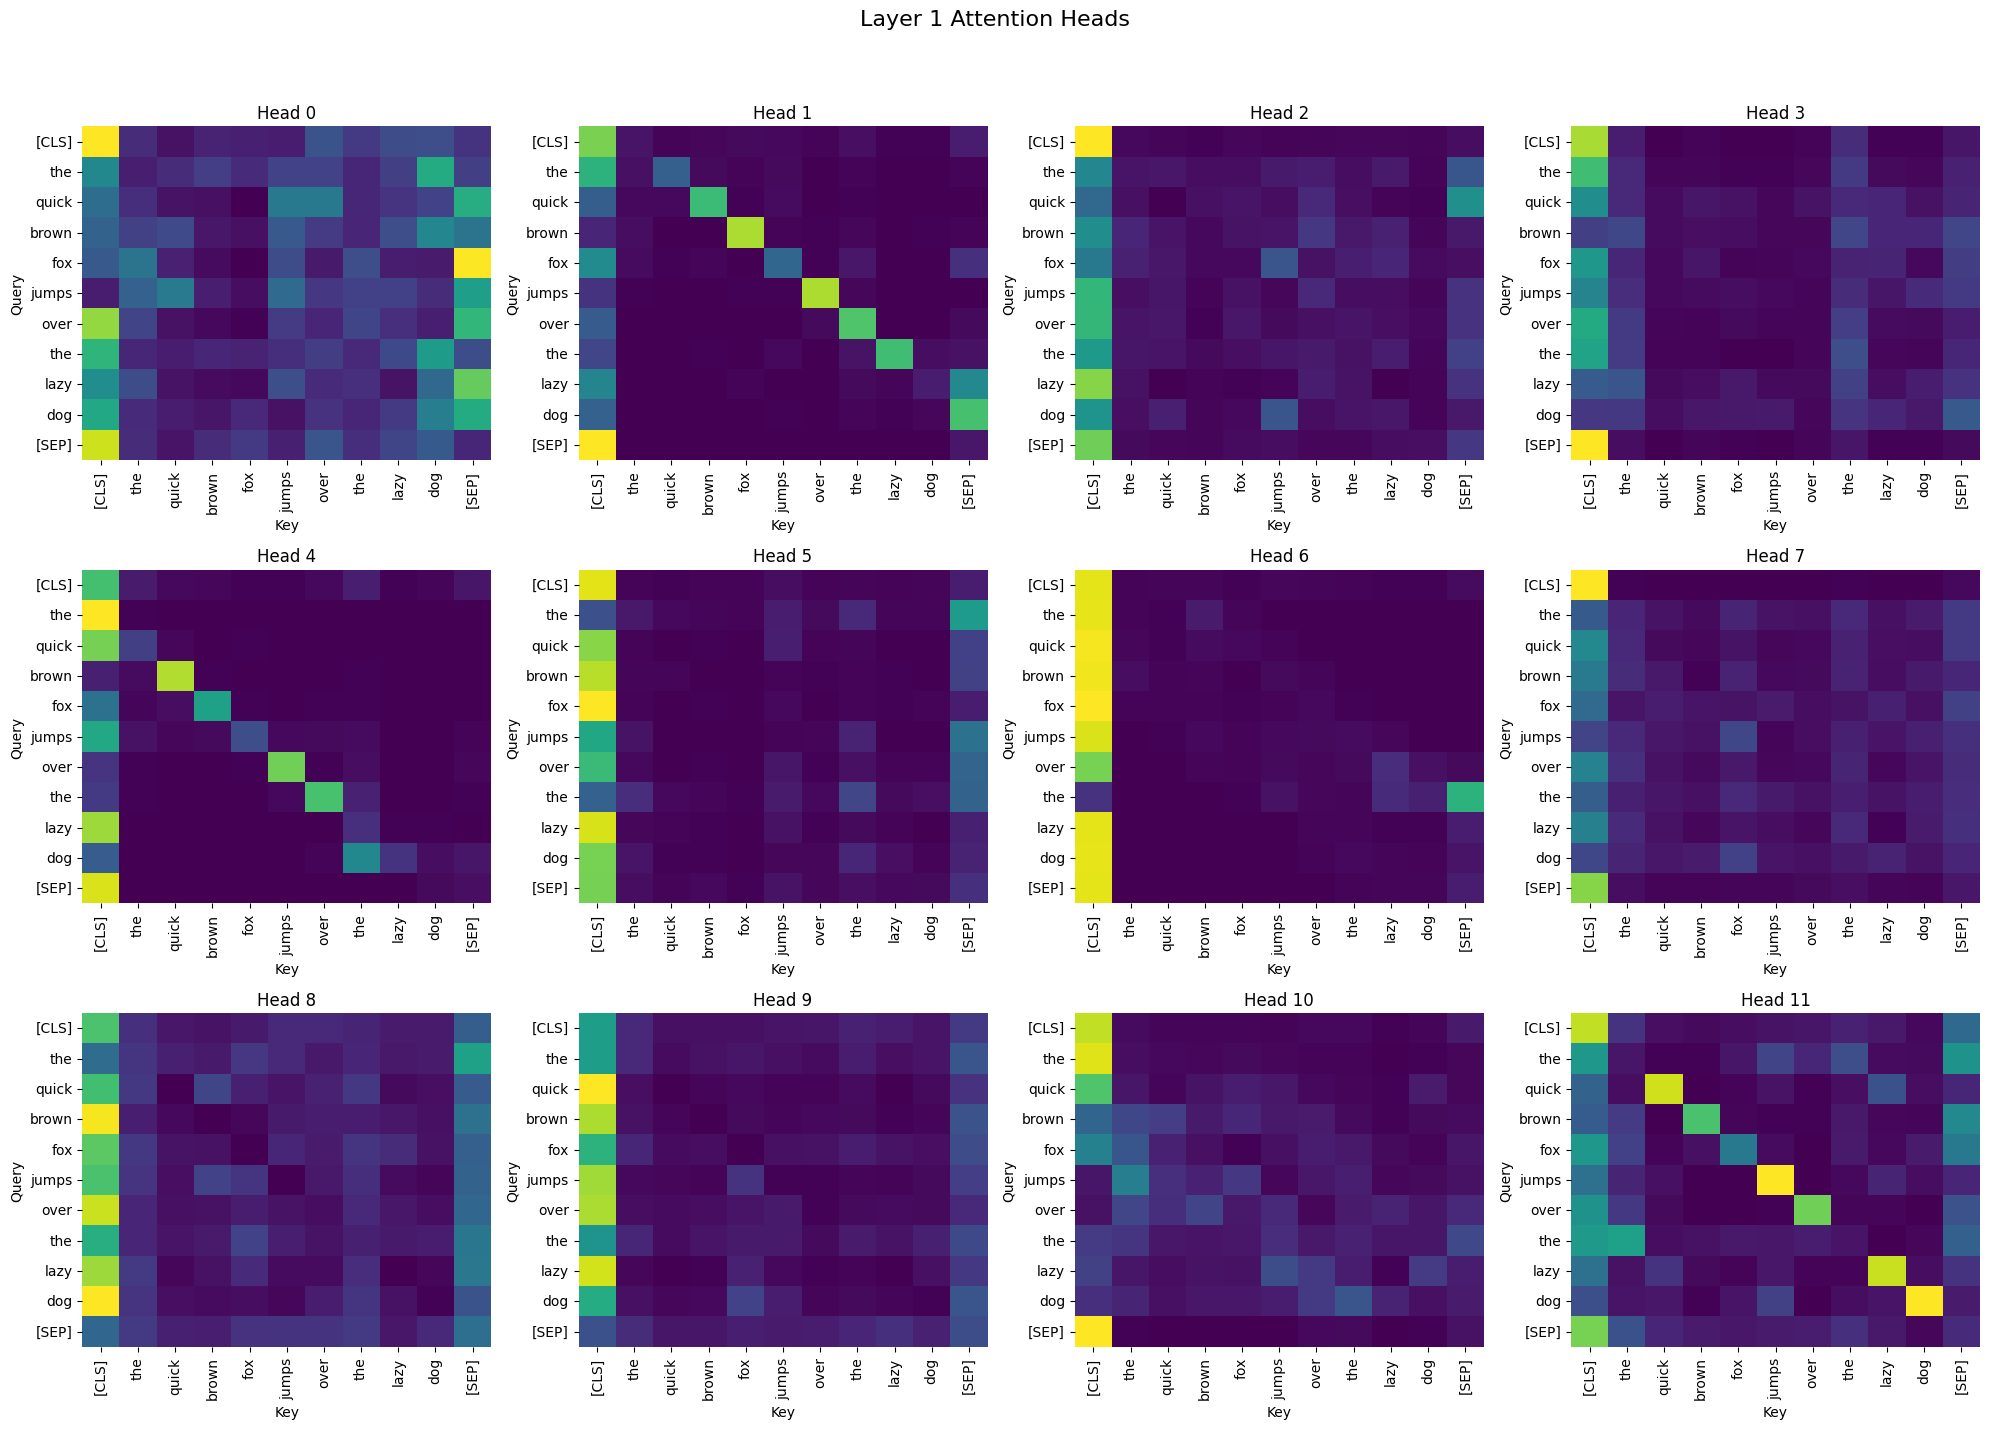

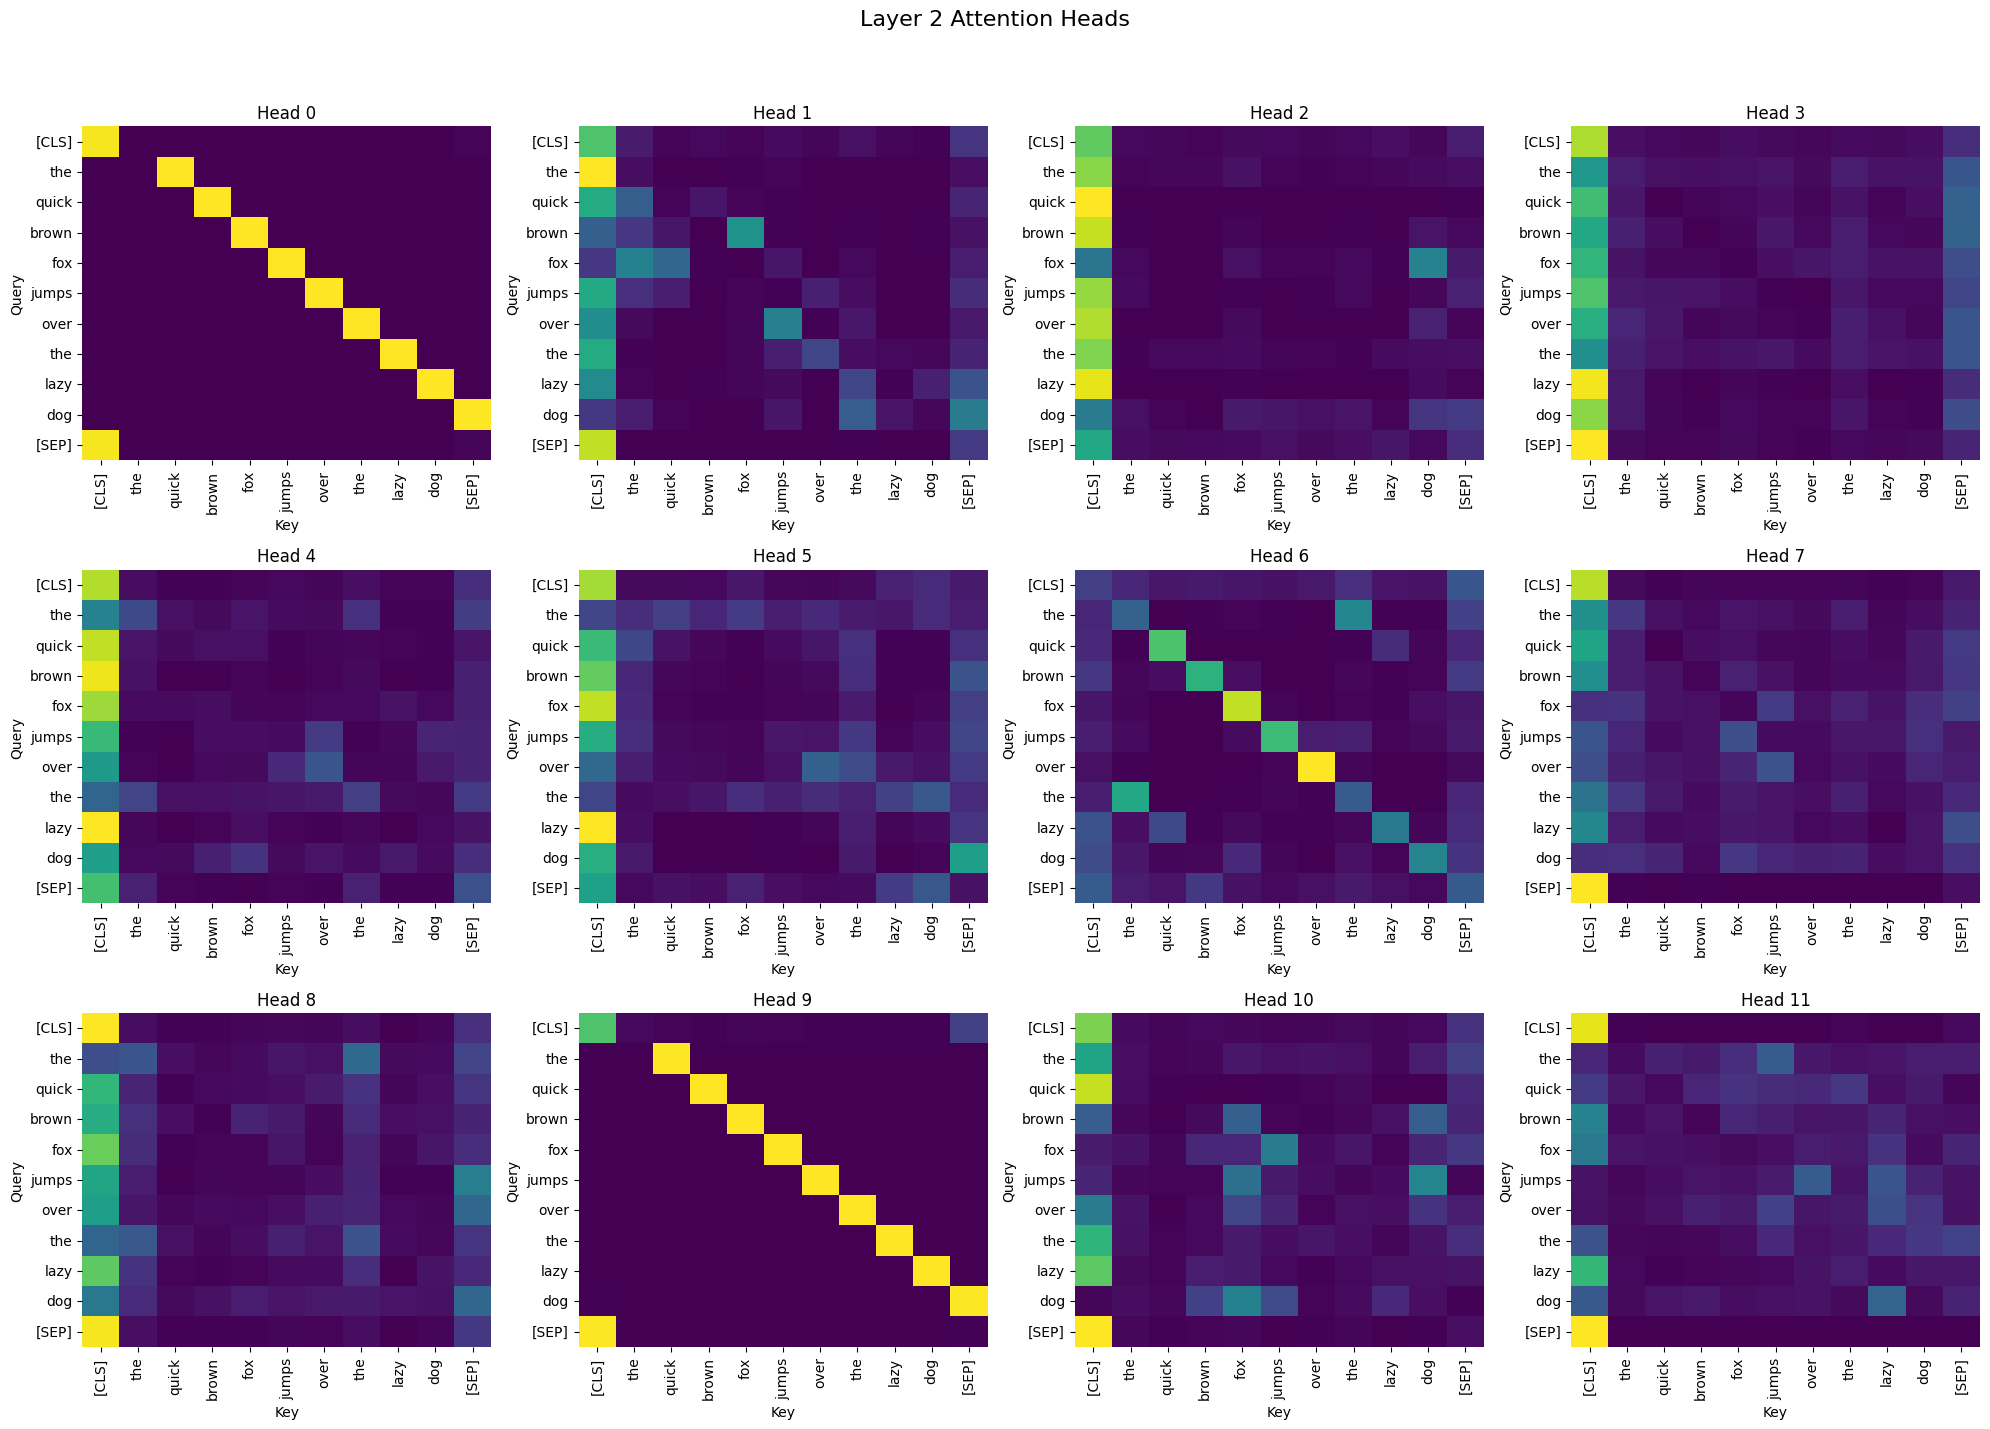

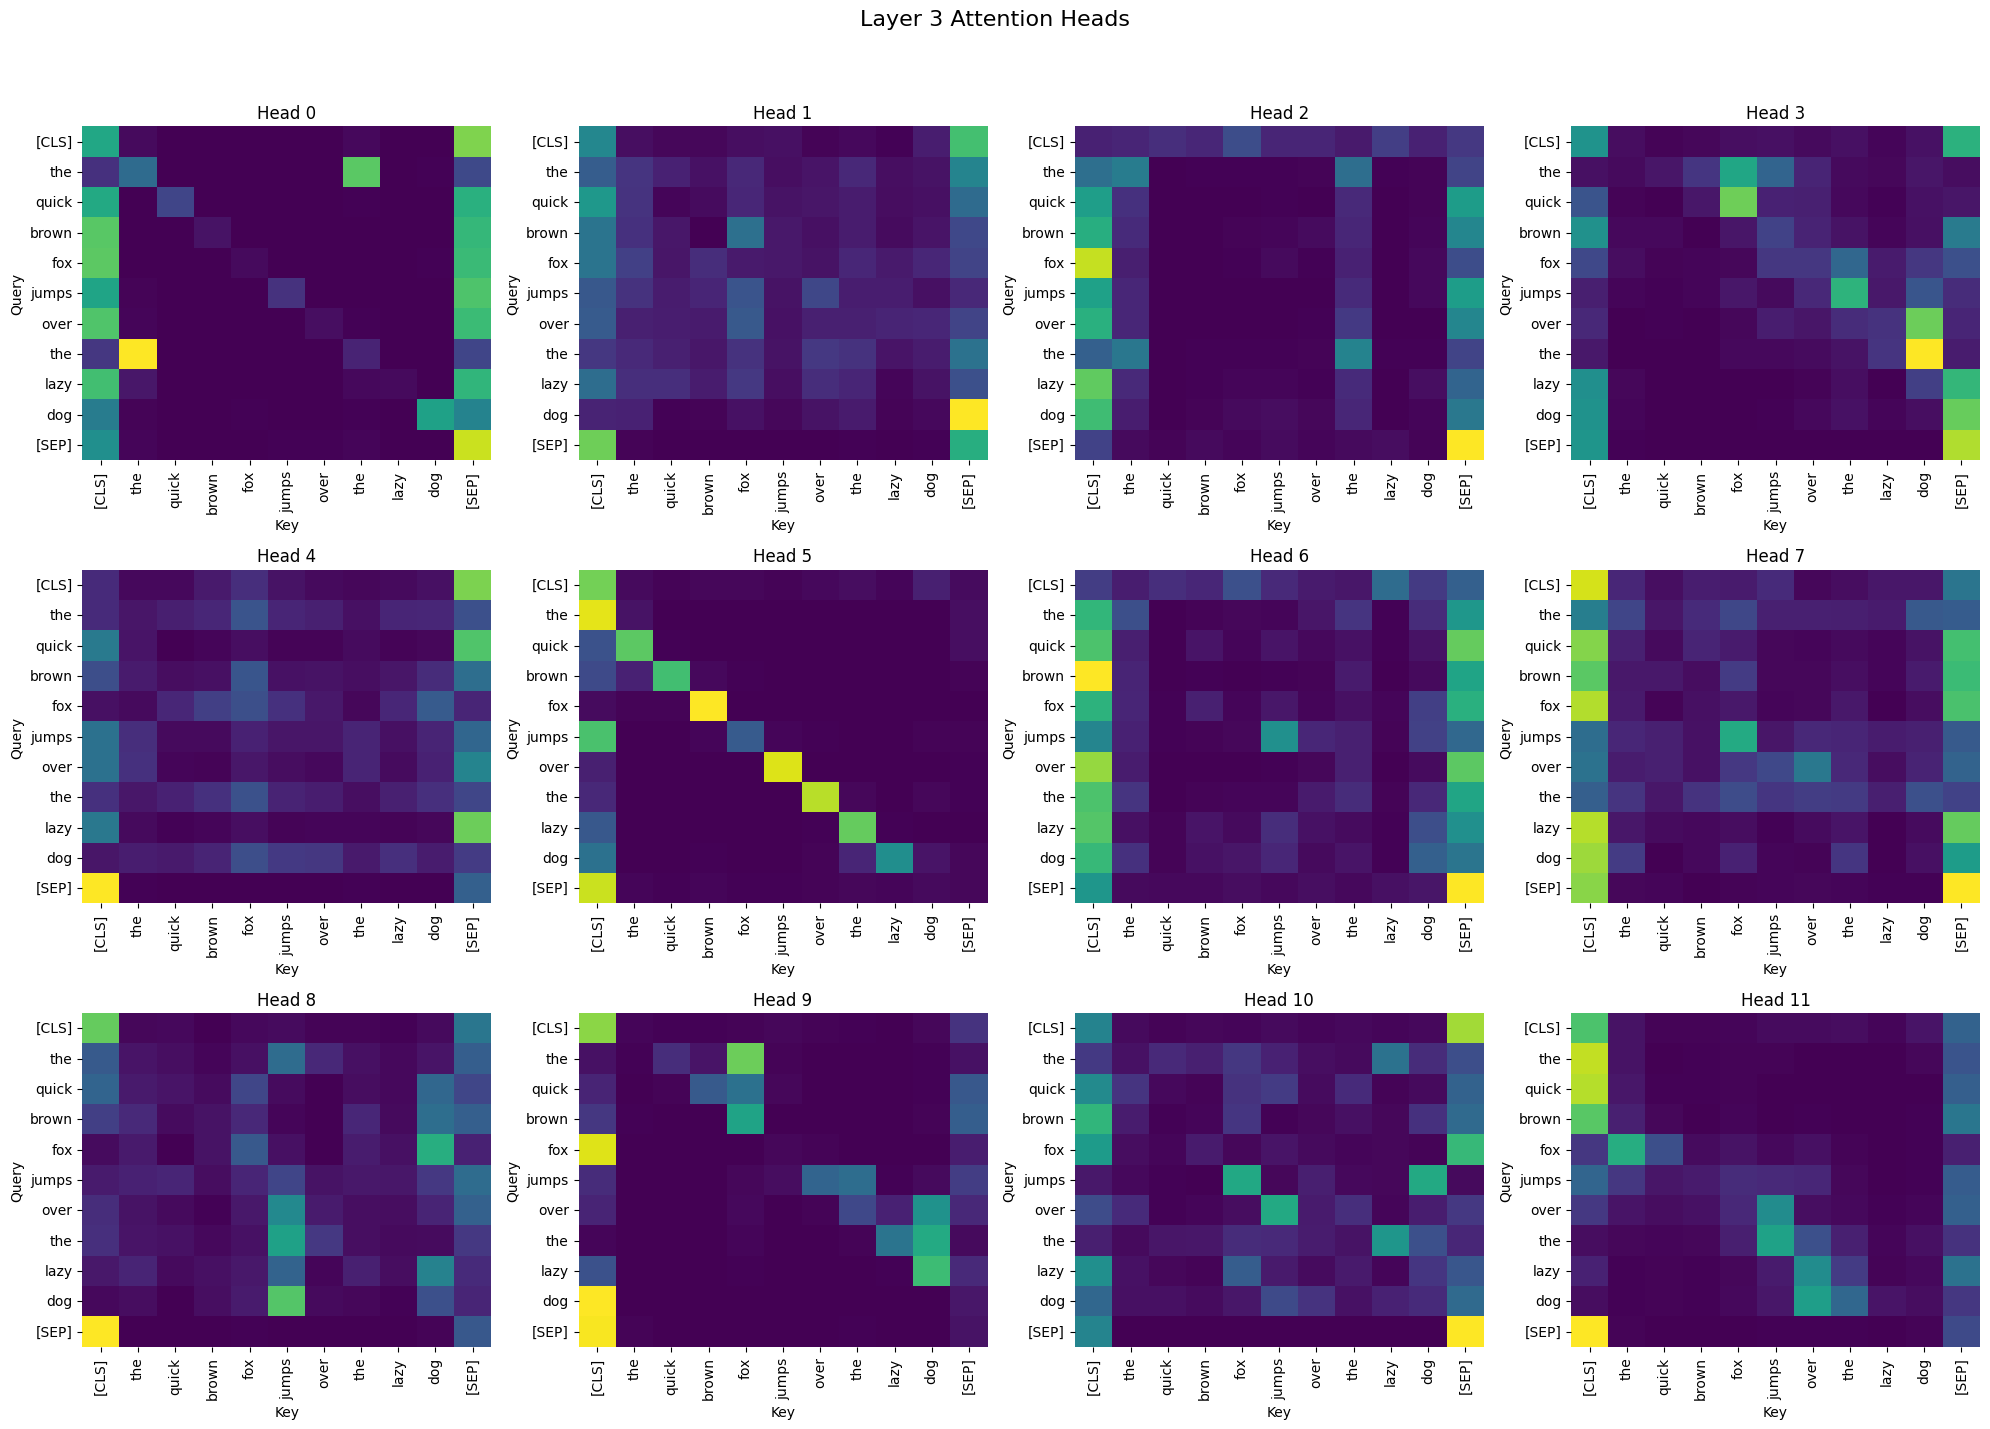

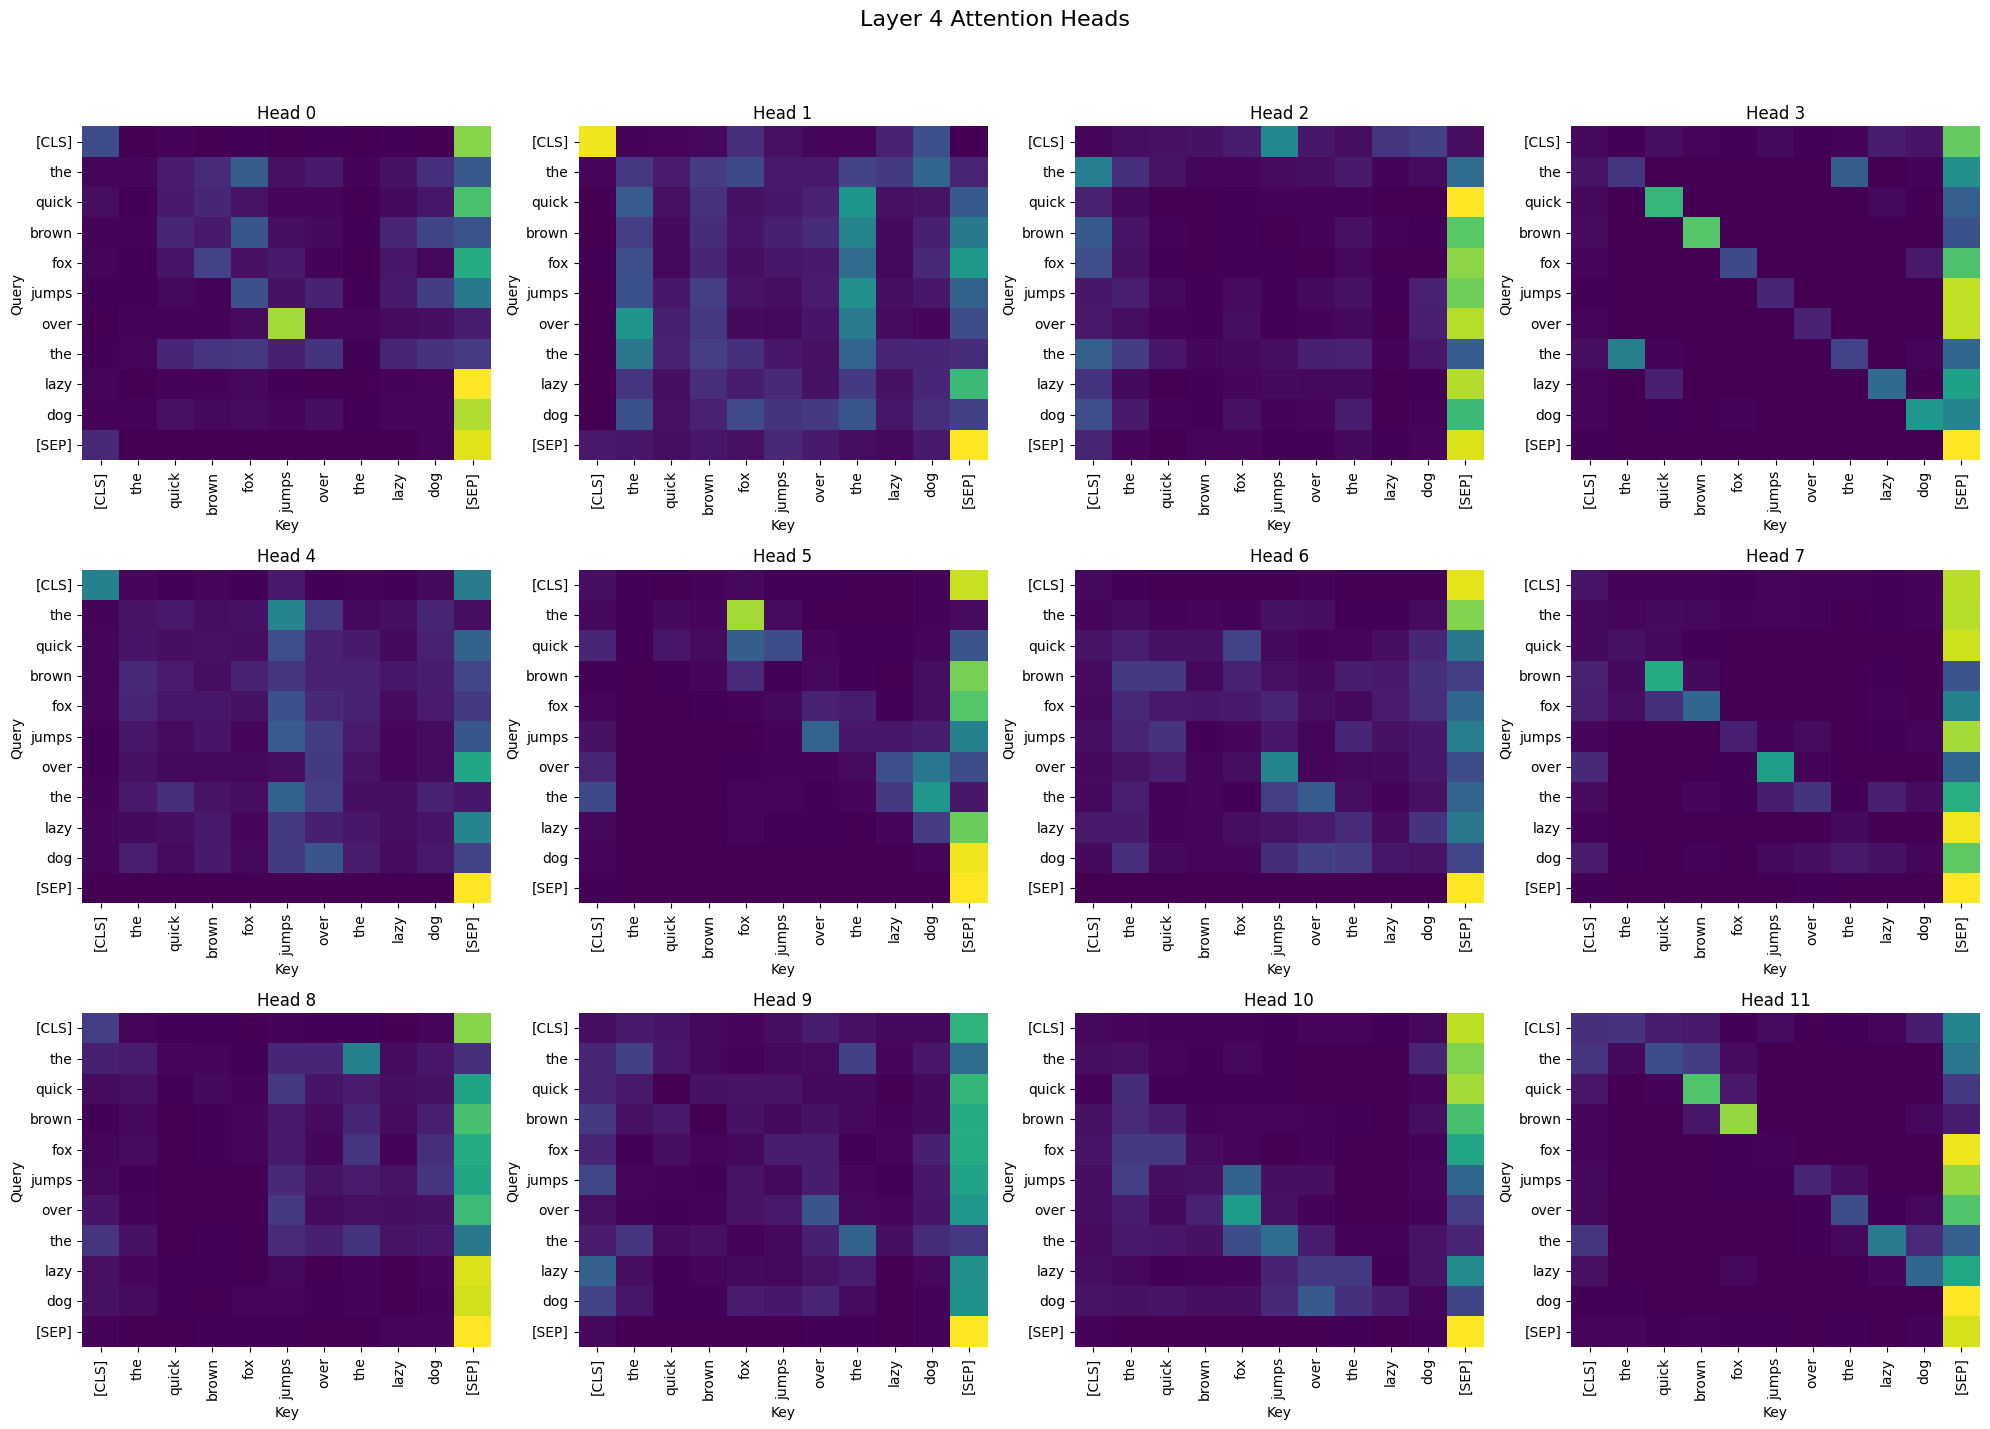

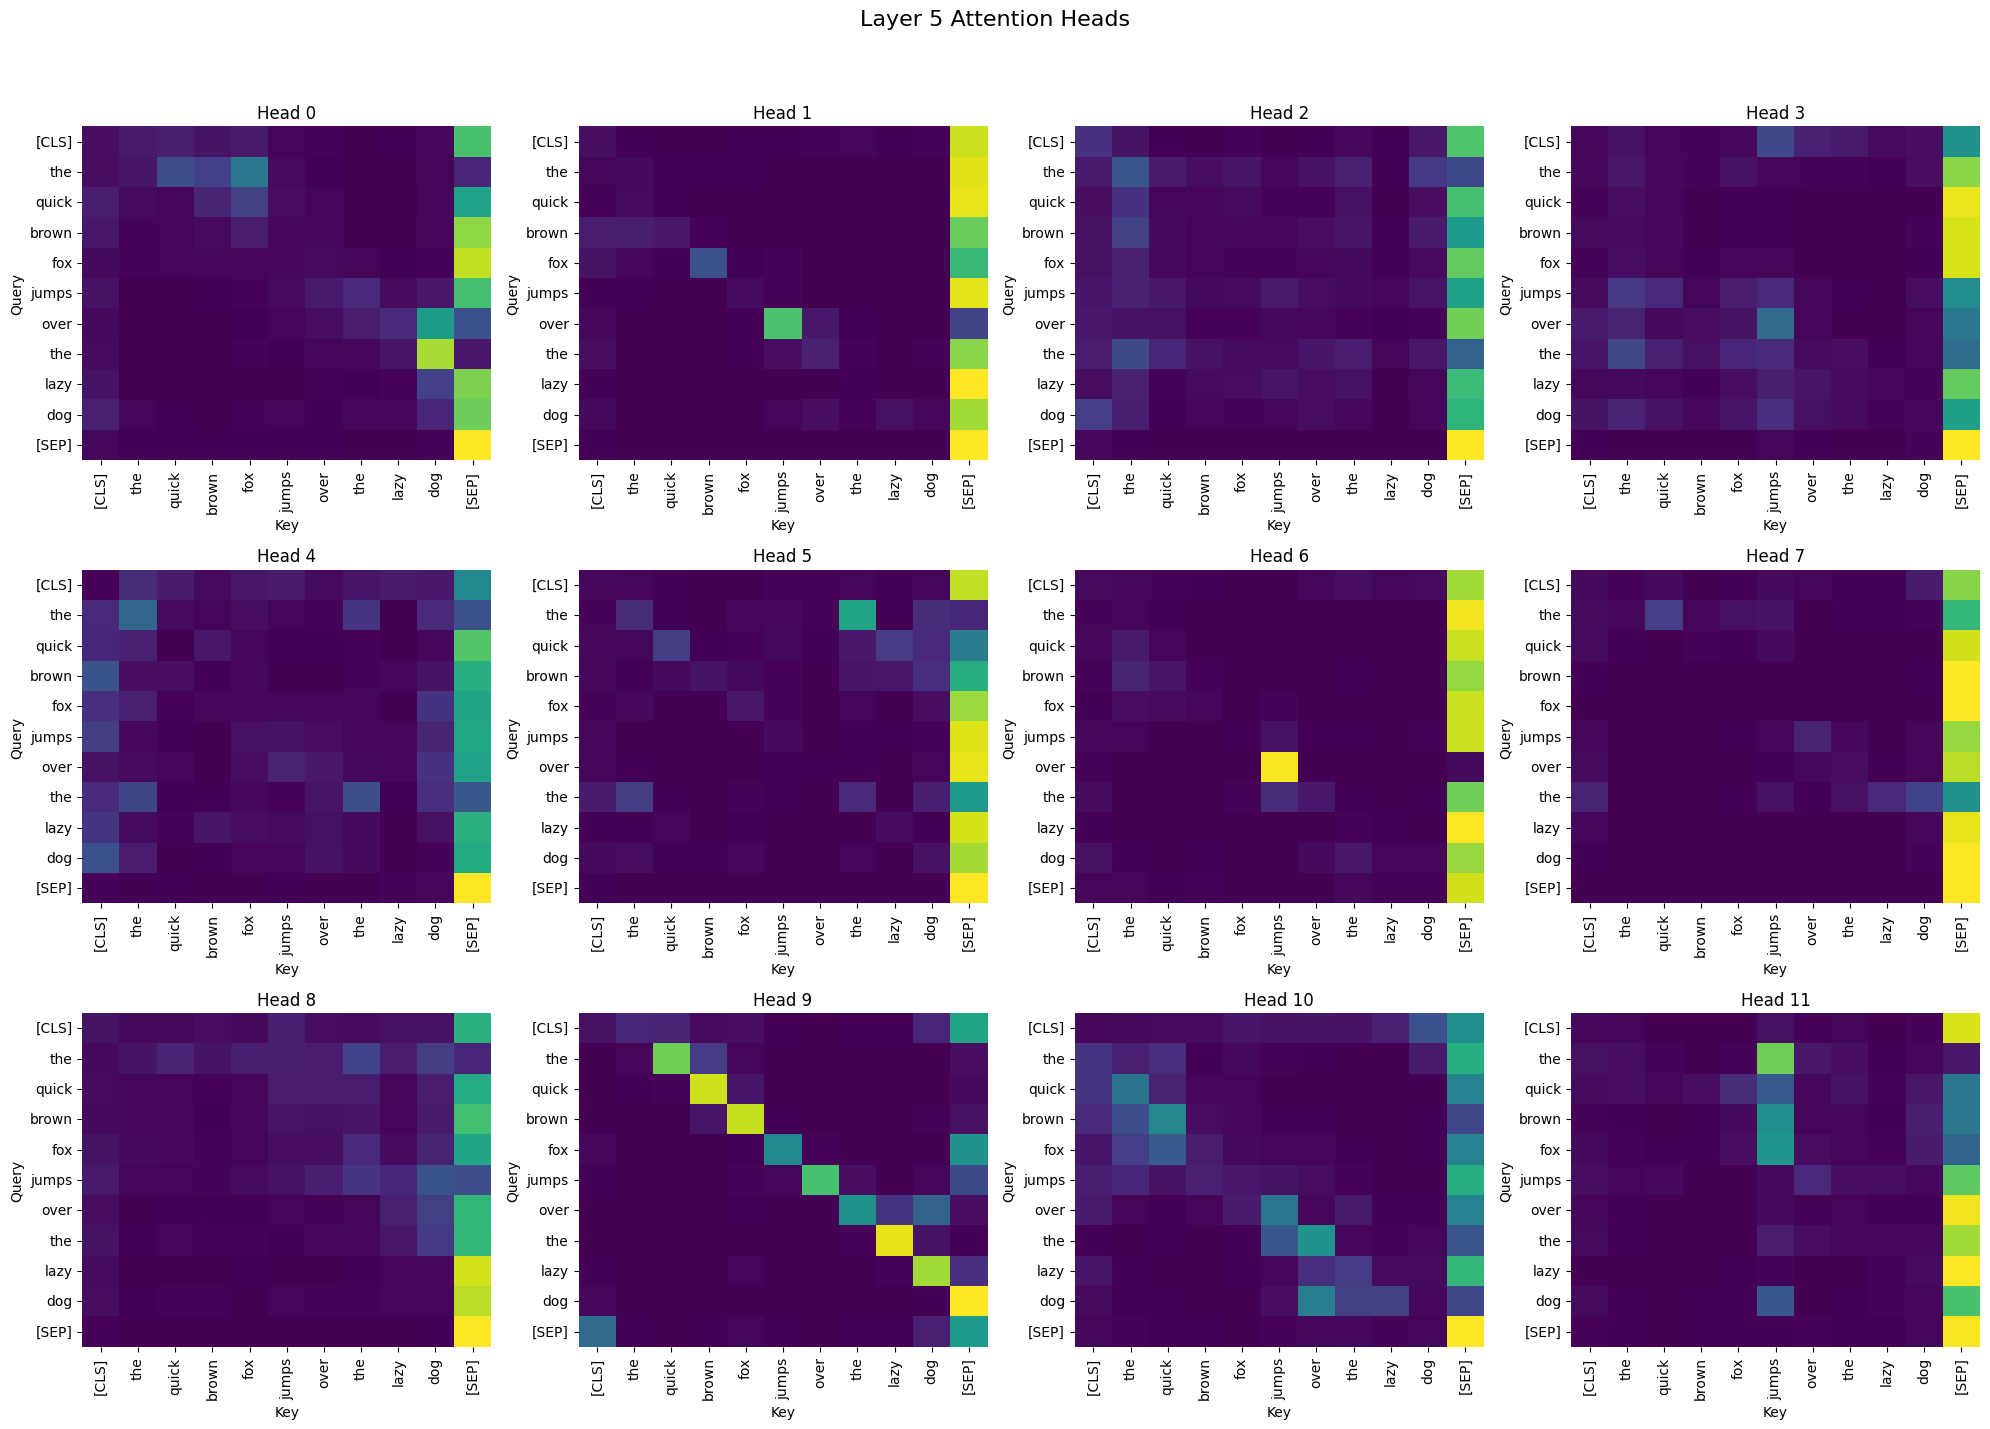

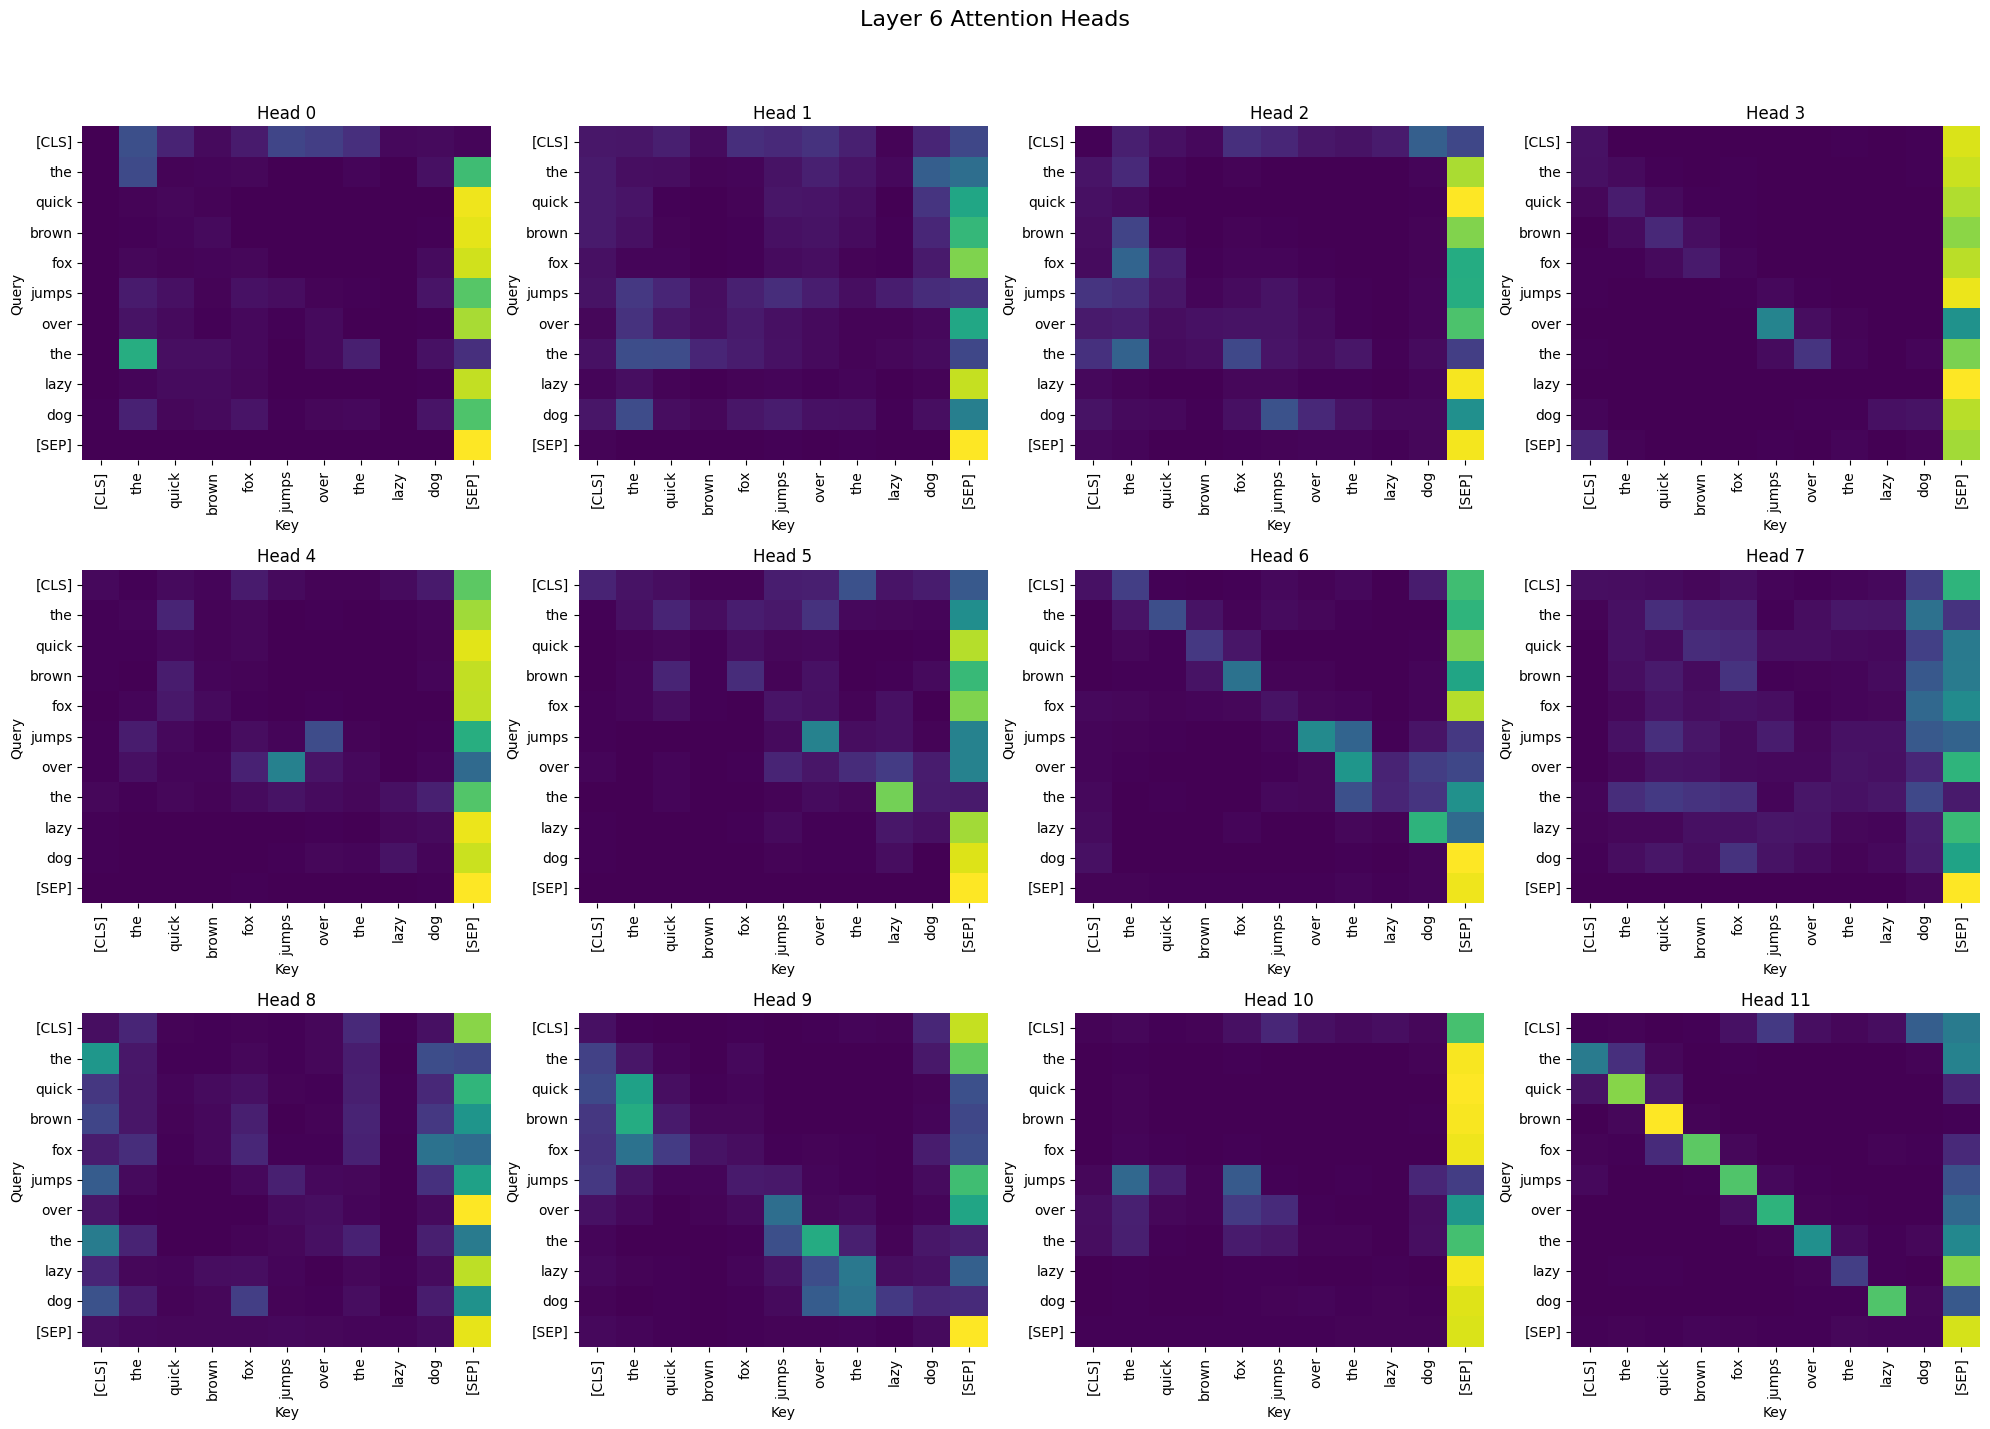

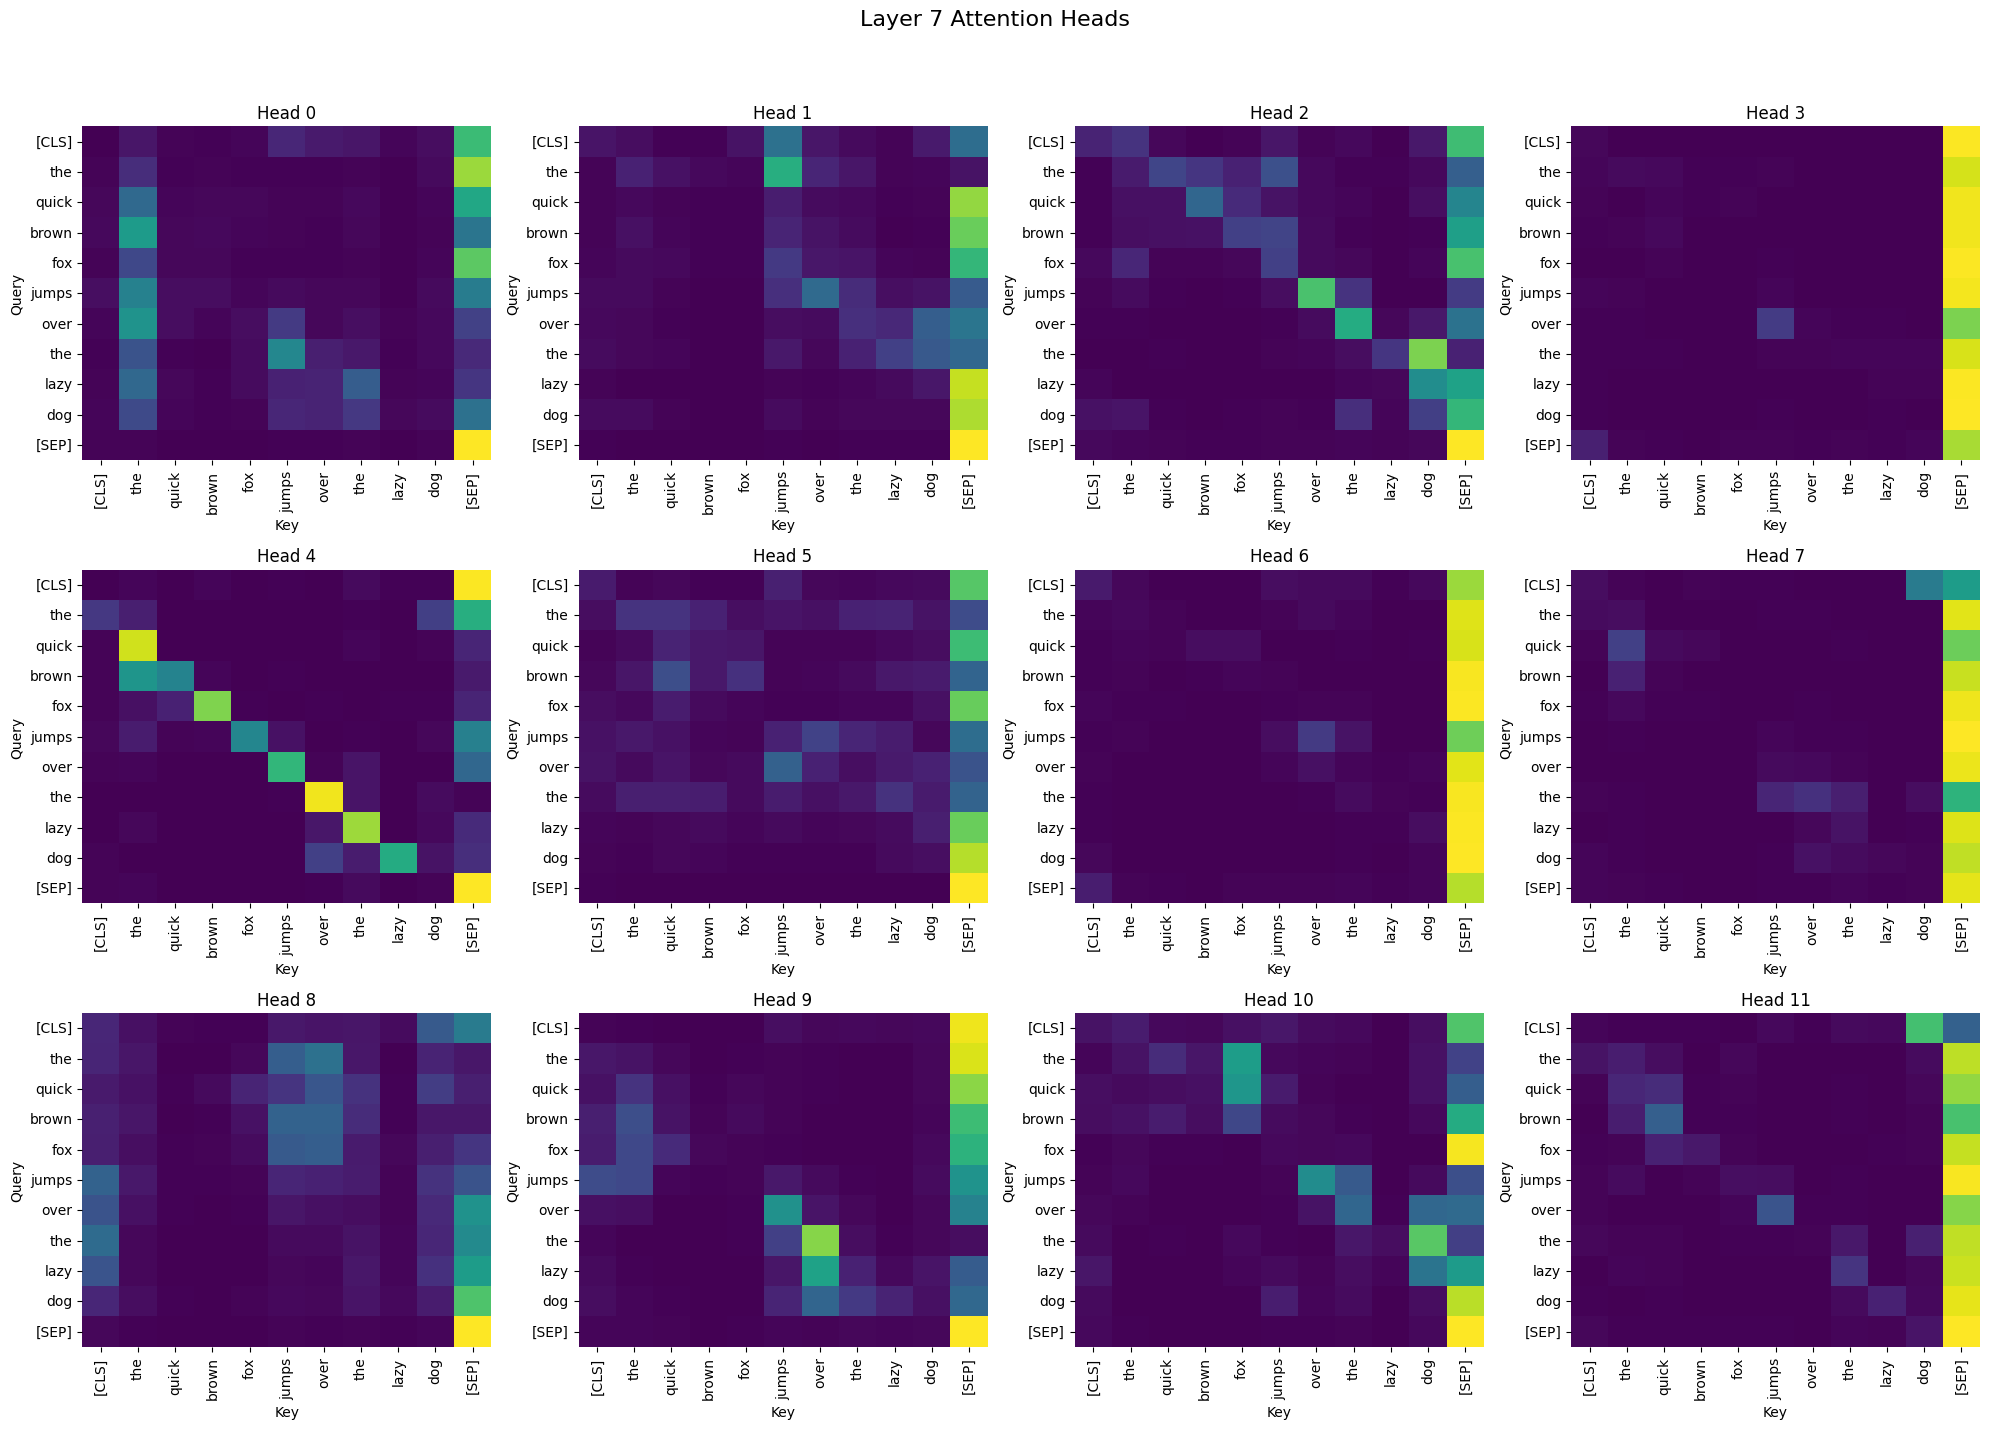

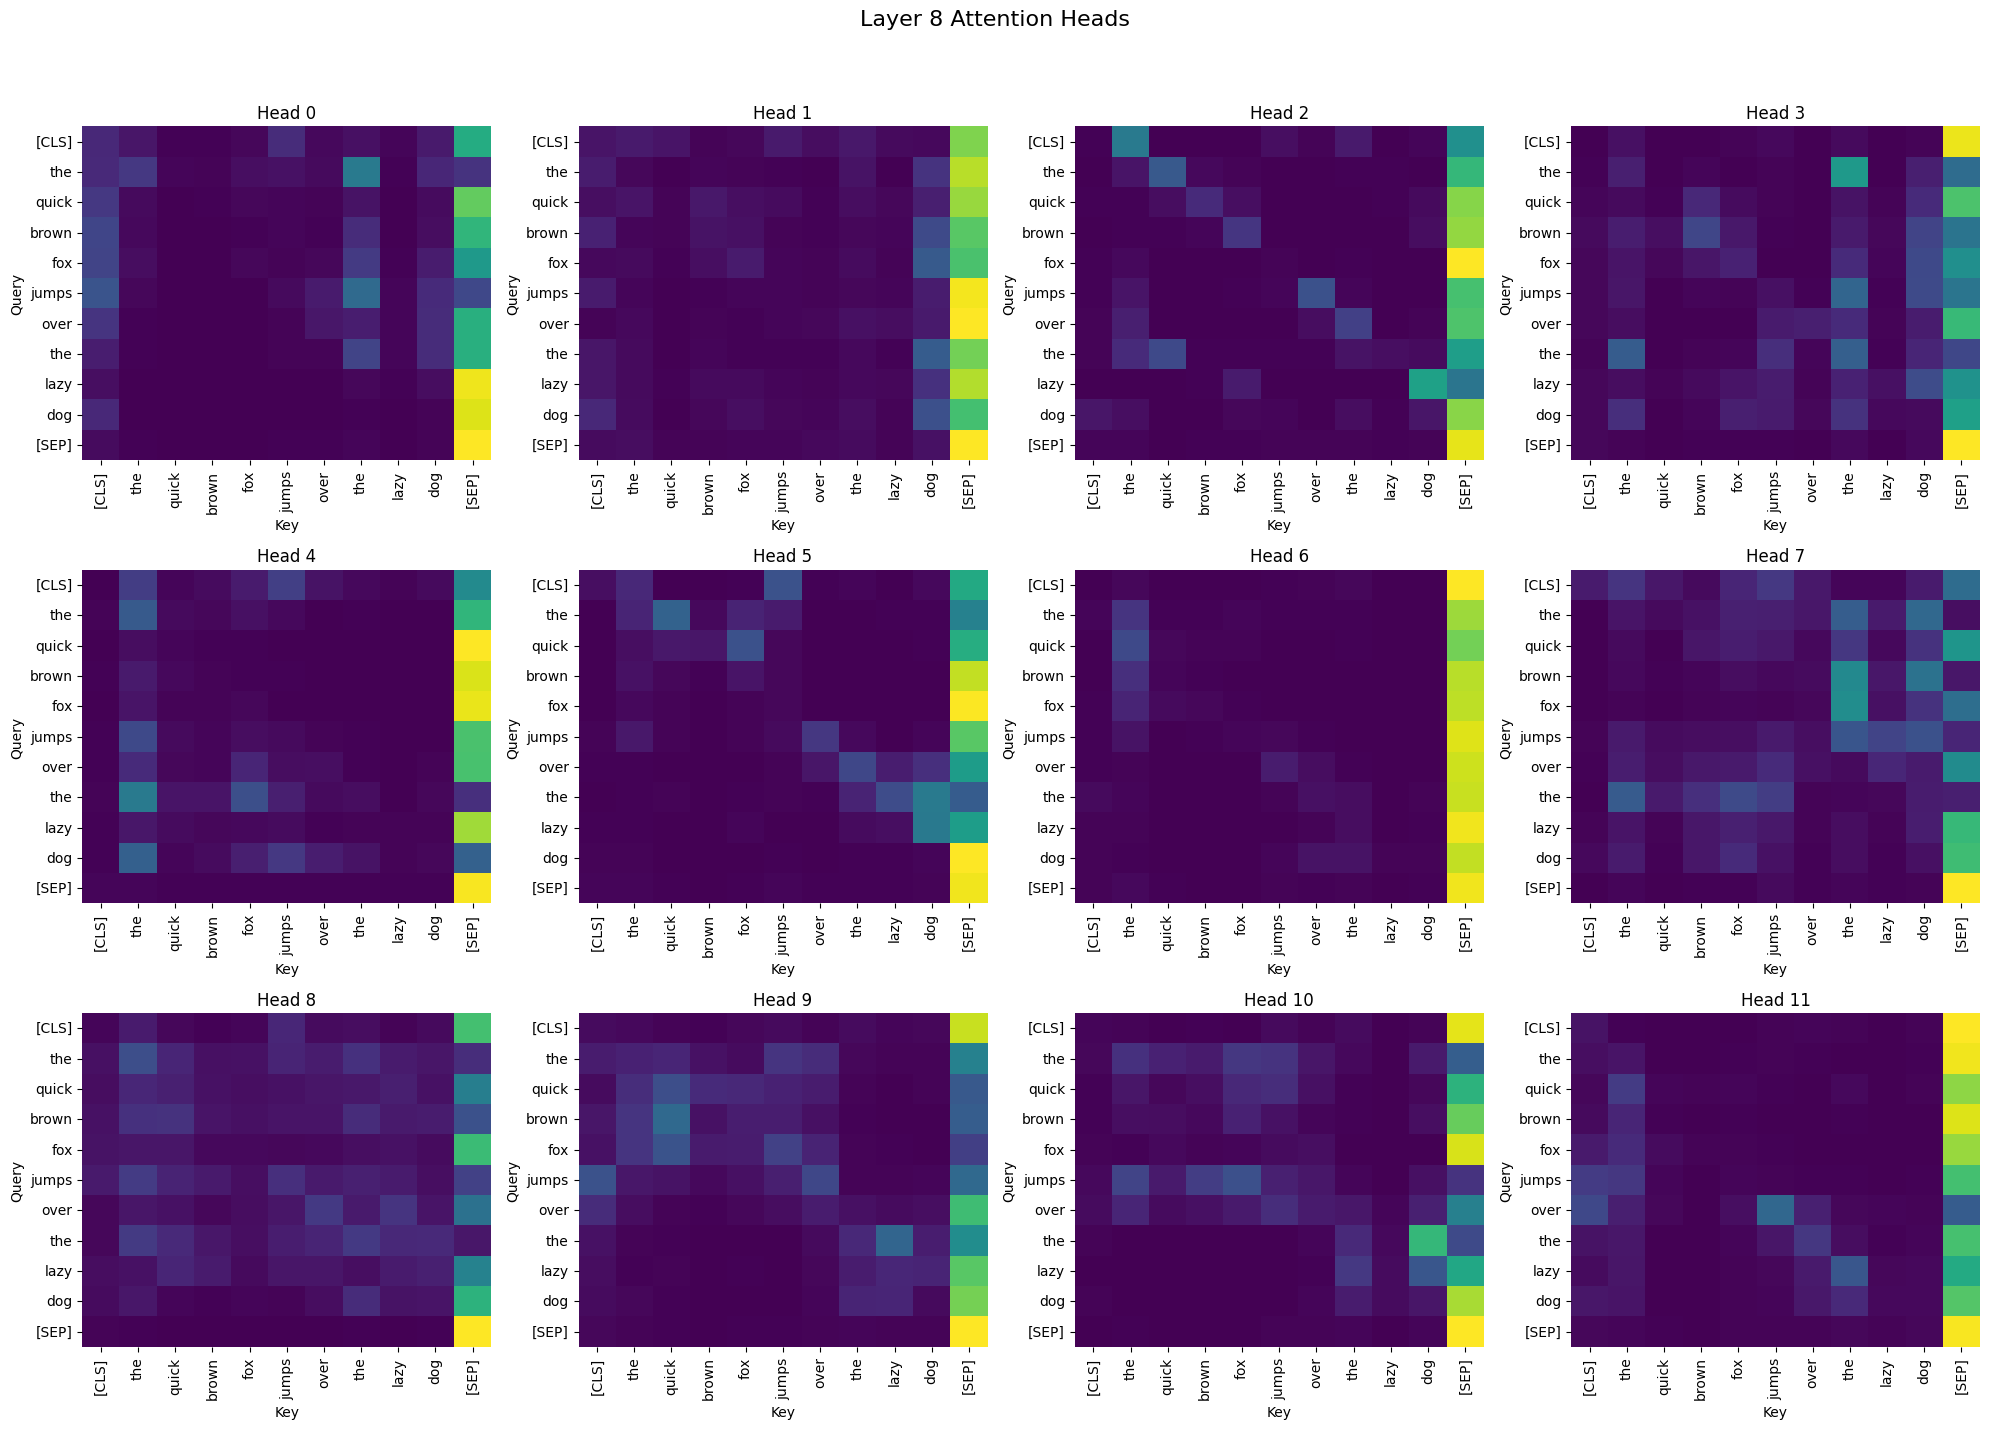

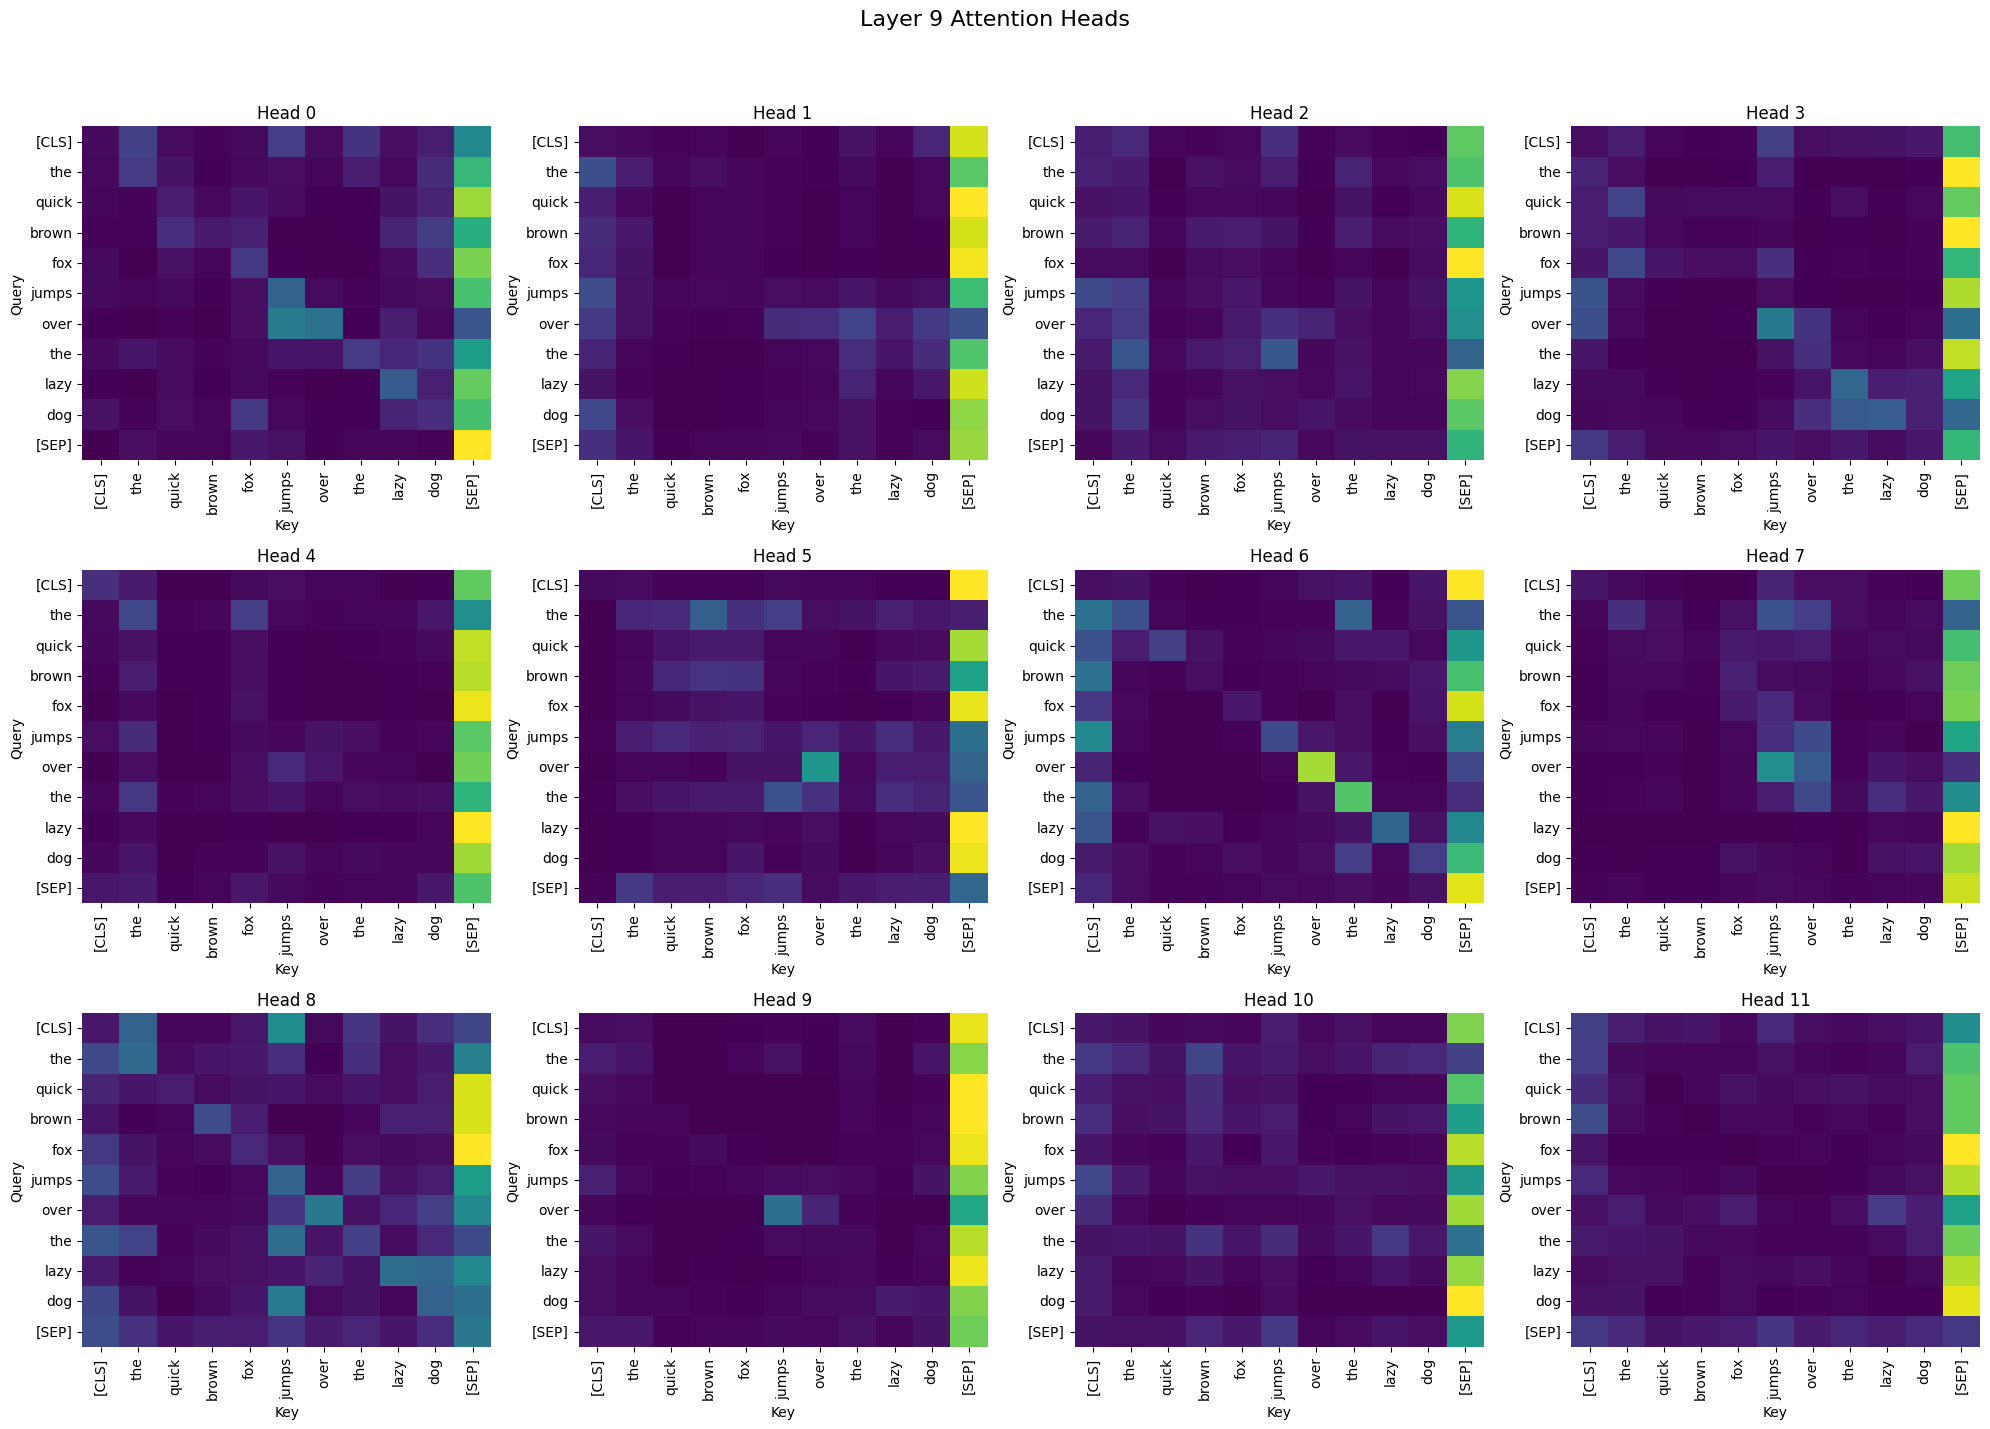

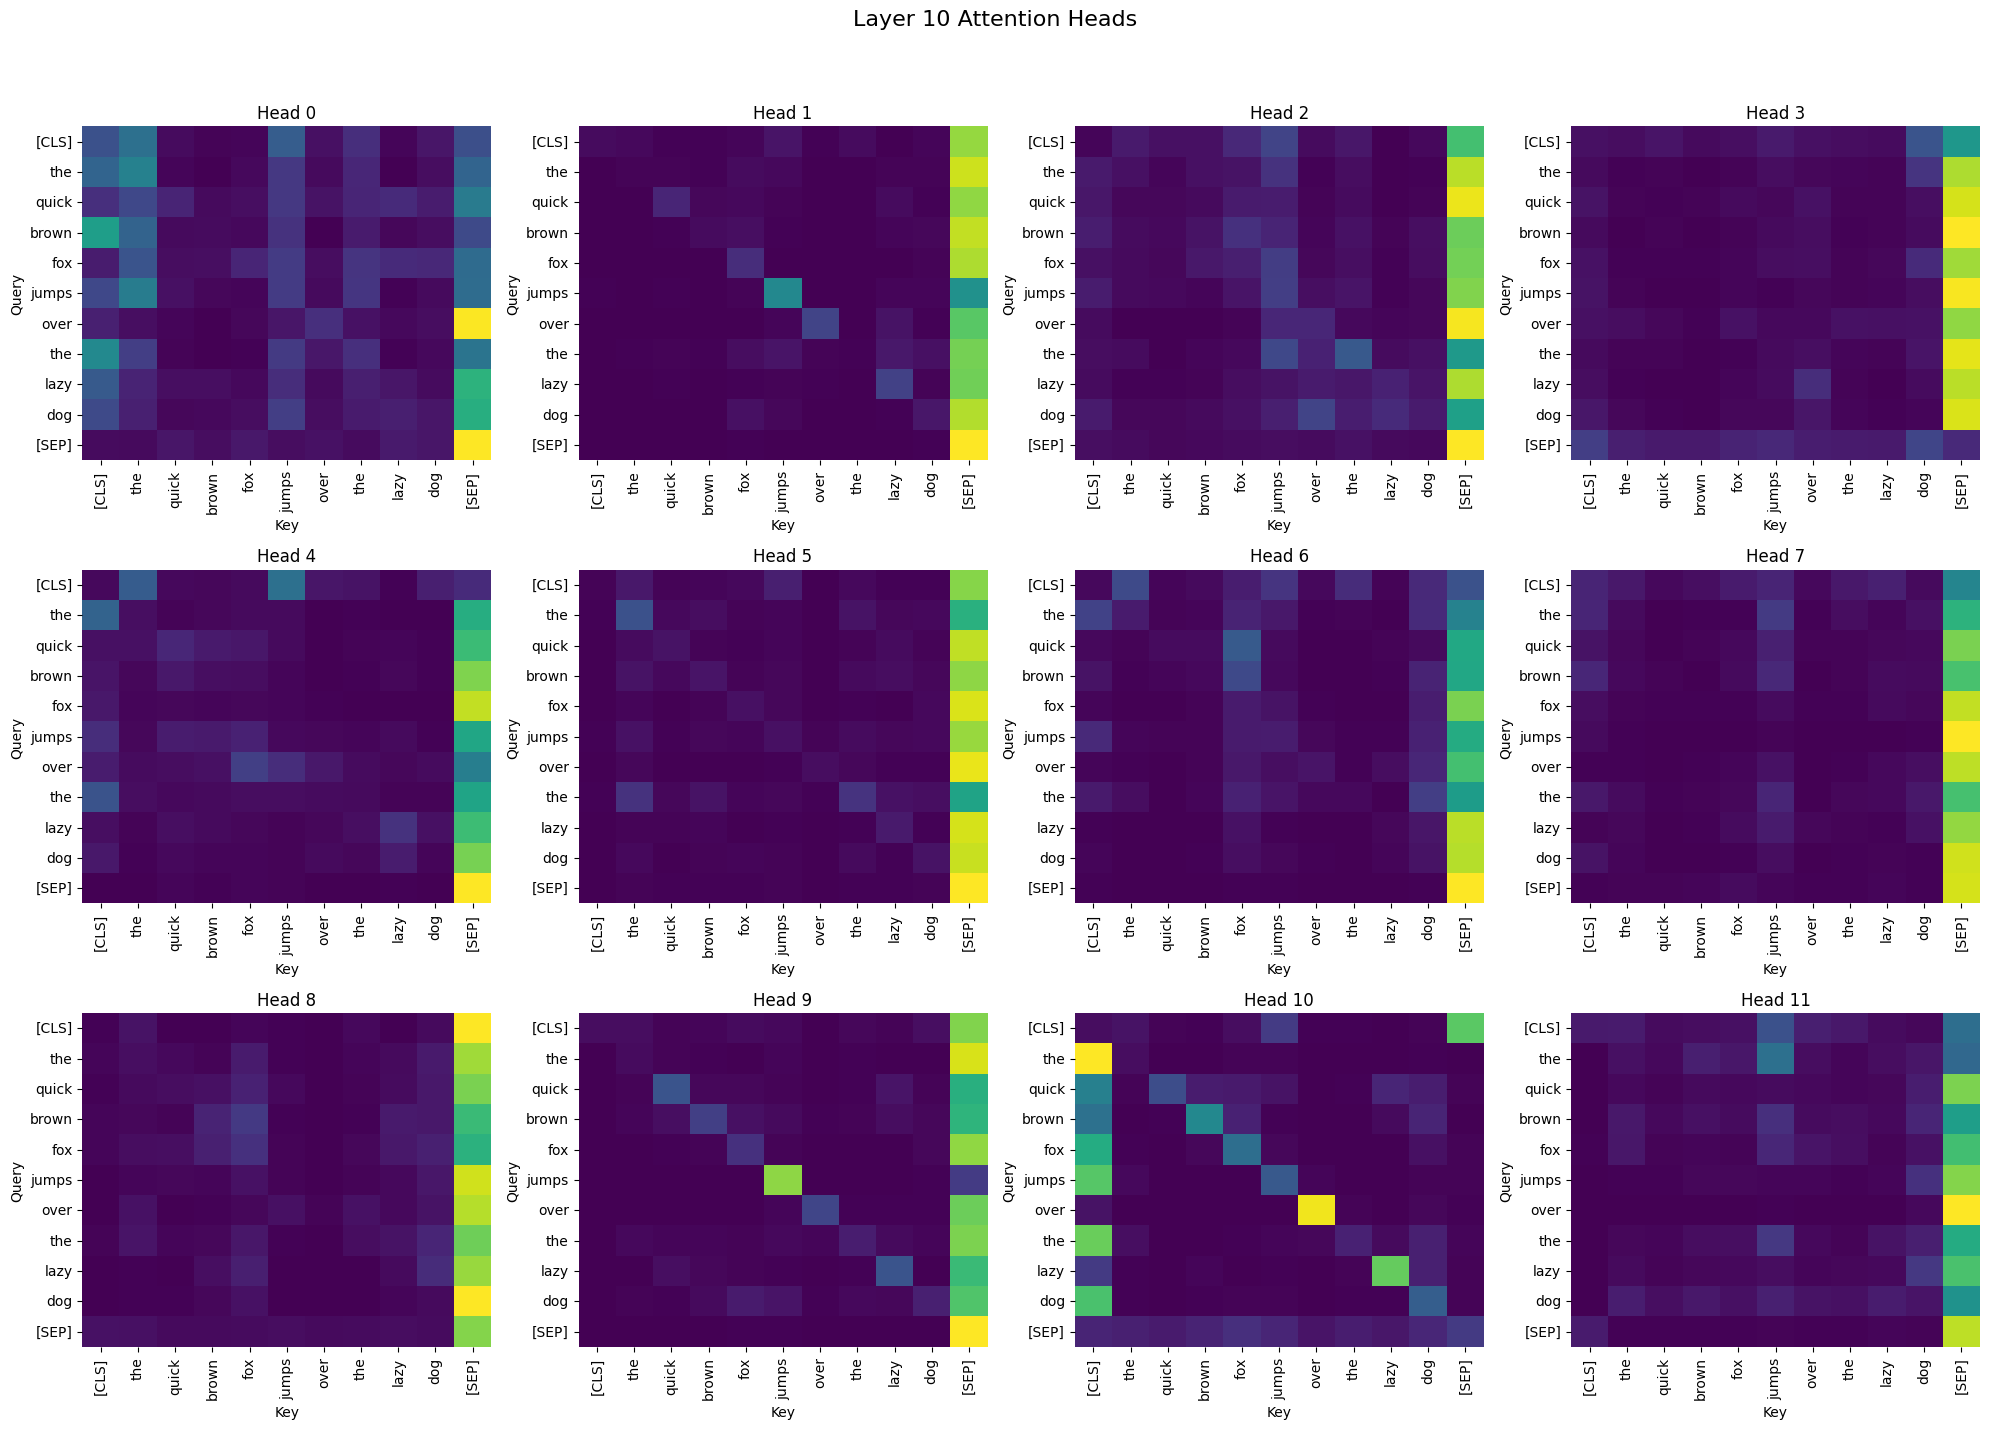

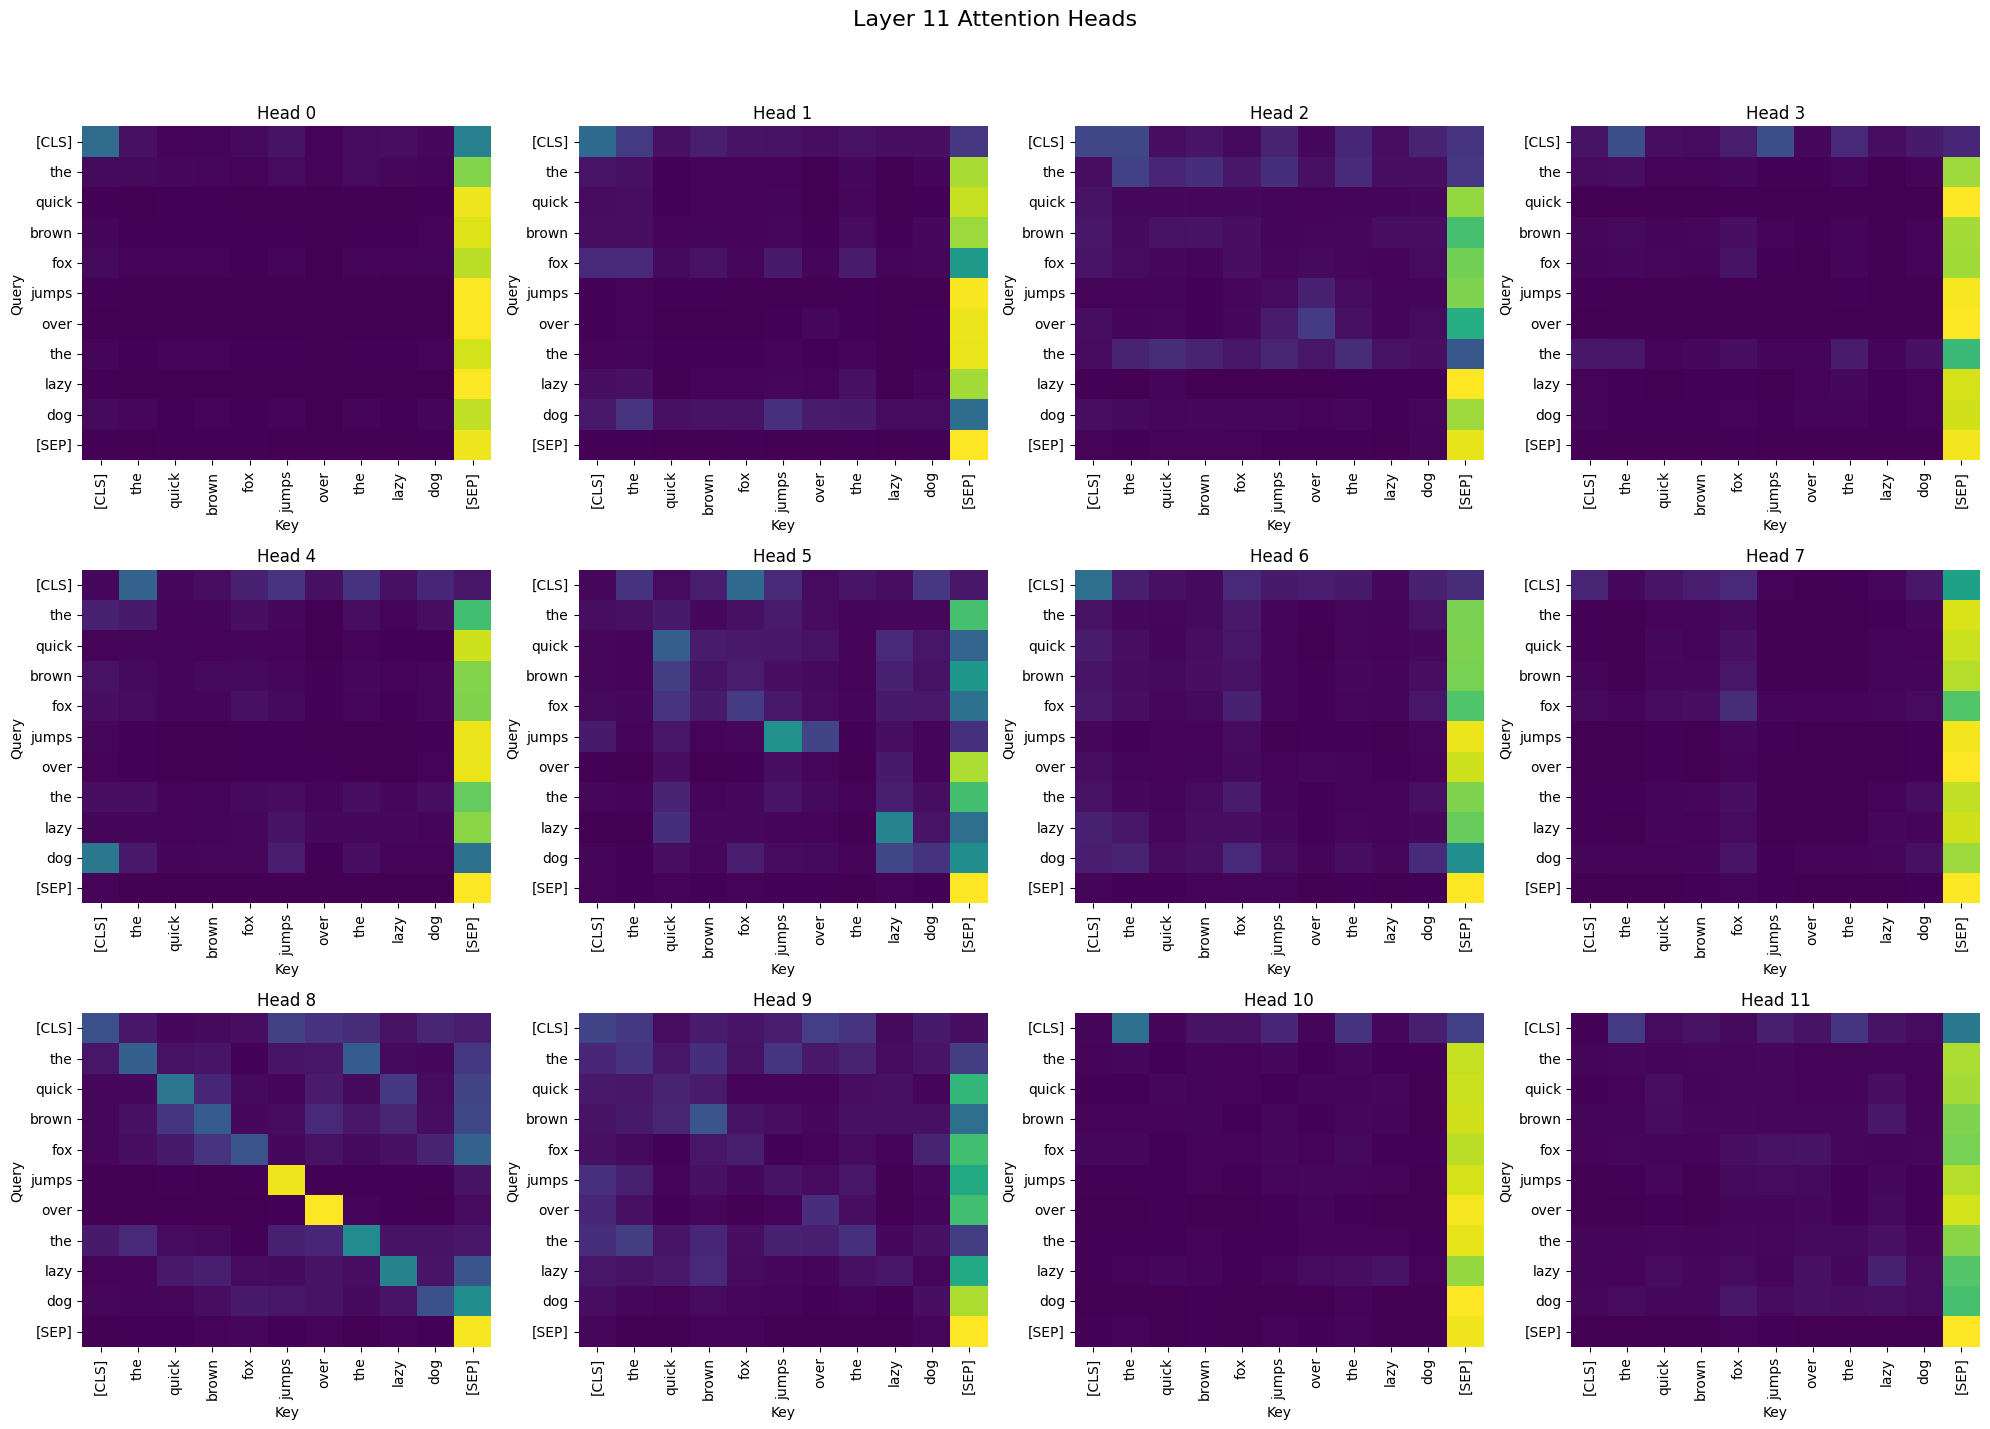

In [3]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load BERT model with attention output
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True, attn_implementation="eager")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Input text
text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# Get attention weights
attentions = outputs.attentions  # list of 12 tensors of shape (1, 12, seq_len, seq_len)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
num_layers = len(attentions)
num_heads = attentions[0].shape[1]

# Iterate over all layers and heads
for layer in range(num_layers):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f'Layer {layer} Attention Heads', fontsize=16)

    for head in range(num_heads):
        ax = axes[head // 4, head % 4]
        attention = attentions[layer][0, head].detach().numpy()
        sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis", ax=ax, cbar=False)
        ax.set_title(f'Head {head}')
        ax.set_xlabel('Key')
        ax.set_ylabel('Query')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
